In [5]:
import pandas as pd
import numpy as np

csv_path = "/Users/joshualunger/deepemotion_variance_01/PCA/hidden/sub_ALL_new.csv"
df = pd.read_csv(csv_path)

# Compute centroid of each emotion
grouped = df.groupby("EmotionLabel")[["PC1", "PC2"]].mean()

# Dictionary of emotion: (centroid_PC1, centroid_PC2)
centroid_dict = {
    emotion: (row["PC1"], row["PC2"])
    for emotion, row in grouped.iterrows()
}

# 2x5 numpy matrix of centroid positions
# (Assuming there are exactly 5 emotions in the data)
X = grouped[["PC1", "PC2"]].to_numpy().T
centroid_dict, X


({'ANGER': (-7.2655398761768435, 8.479087614508725),
  'FEAR': (-30.53747463923155, 3.2852604680545654),
  'HAPPINESS': (14.803100715958195, 14.38631170254424),
  'LOVE': (12.869554952675, -5.198517098256204),
  'SADNESS': (5.566536984730621, -15.434277751319689)},
 array([[ -7.26553988, -30.53747464,  14.80310072,  12.86955495,
           5.56653698],
        [  8.47908761,   3.28526047,  14.3863117 ,  -5.1985171 ,
         -15.43427775]]))

/var/folders/00/75nc8xcs34z9dkcwmfq5_6d80000gn/T/ipykernel_17528/2099515439.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.9])


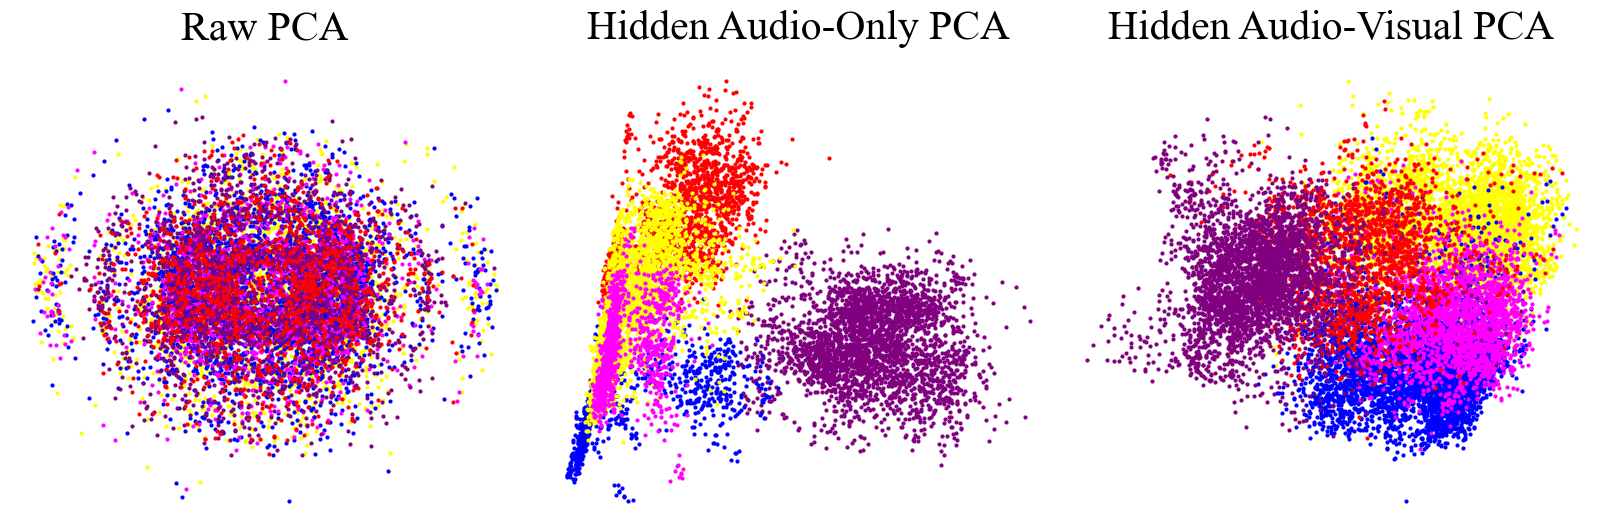

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Color mapping
color_map = {
    'HAPPINESS': 'yellow',
    'ANGER': 'red',
    'SADNESS': 'blue',
    'LOVE': 'magenta',
    'FEAR': 'purple'
}

# Load raw and hidden PCA data
df_raw = pd.read_csv("/Users/joshualunger/deepemotion_variance_01/PCA/raw/sub_ALL.csv")
df_hidden = pd.read_csv("/Users/joshualunger/deepemotion_variance_01/PCA/hidden/sub_ALL_new.csv")
df_hidden_ao = pd.read_csv("/Users/joshualunger/deepemotion_variance_01/PCA/hidden/sub_ALL_ao.csv")
X_raw = df_raw[["PC1", "PC2"]].to_numpy().T
X_hidden = df_hidden[["PC1", "PC2"]].to_numpy().T
X_hidden_ao = df_hidden_ao[["PC1", "PC2"]].to_numpy().T

plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 20,  # Increase base font size
    "axes.titlesize": 30,
    "axes.labelsize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 16
})

fig, axes = plt.subplots(1, 3, figsize=(21, 6), gridspec_kw={'wspace': -0.05})


def clean_scatter(ax, X, df, title=""):
    colors = [color_map.get(emotion, 'gray') for emotion in df['EmotionLabel']]
    ax.scatter(
        X[0],
        X[1],
        color=colors,
        s=4
    )
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_title(title)
# Plot without titles
clean_scatter(axes[0], X_raw, df_raw)
clean_scatter(axes[1], X_hidden_ao, df_hidden_ao)
clean_scatter(axes[2], X_hidden, df_hidden)

# Get each axis position and compute center x
for ax in axes:
    ax.set_title("")  # clear titles if any

positions = [ax.get_position() for ax in axes]
centers_x = [(pos.x0 + pos.x1) / 2 for pos in positions]

# Add aligned titles at the same y position
y_title = positions[0].y1 + 0.02
titles = ["Raw PCA", "Hidden Audio-Only PCA", "Hidden Audio-Visual PCA"]

for cx, title in zip(centers_x, titles):
    fig.text(cx, y_title, title, ha='center', va='bottom', fontsize=30)

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

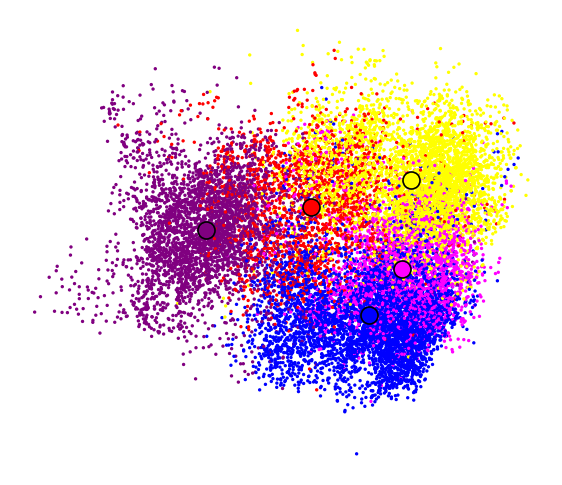

In [26]:
fig, ax = plt.subplots(figsize=(7, 7), facecolor='none')
fig.patch.set_alpha(0.0)  # Transparent background

# Scatter all points in order
colors = [color_map.get(emotion, 'gray') for emotion in df_hidden['EmotionLabel']]
ax.scatter(
    X_hidden[0],
    X_hidden[1],
    color=colors,
    s=2
)

# Overlay emotion means
for emotion in df_hidden['EmotionLabel'].unique():
    idx = df_hidden['EmotionLabel'] == emotion
    x_mean = X_hidden[0, idx].mean()
    y_mean = X_hidden[1, idx].mean()
    ax.scatter(
        x_mean,
        y_mean,
        facecolor=color_map.get(emotion, 'gray'),
        edgecolor='black',
        s=150,
        linewidth=1.2
    )

# Clean up plot
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
for spine in ax.spines.values():
    spine.set_visible(False)
ax.axis('off')

plt.savefig("pca_hidden_av.png", transparent=True, dpi=300)
plt.show()


In [13]:
import pandas as pd
import numpy as np

# Canonical valence-arousal coordinates (approximate) for these emotions
# Format: (valence, arousal)
canonical_positions = {
    "ANGER":     (0, 1),
    "FEAR":      (-2, 1),
    "HAPPINESS": (1, 1),
    "LOVE":      (1, -1),
    "SADNESS":   (-1, 1)
}

normalized_positions = {
    emotion: tuple(np.array(pos) / np.linalg.norm(pos))
    for emotion, pos in canonical_positions.items()
}

print(normalized_positions)

# Build the same 2x5 structure for canonical positions
Y = np.array([normalized_positions[e] for e in centroid_dict]).T

Y


{'ANGER': (0.0, 1.0), 'FEAR': (-0.8944271909999159, 0.4472135954999579), 'HAPPINESS': (0.7071067811865475, 0.7071067811865475), 'LOVE': (0.7071067811865475, -0.7071067811865475), 'SADNESS': (-0.7071067811865475, 0.7071067811865475)}


array([[ 0.        , -0.89442719,  0.70710678,  0.70710678, -0.70710678],
       [ 1.        ,  0.4472136 ,  0.70710678, -0.70710678,  0.70710678]])

In [14]:
import numpy as np

# Assume X and Y are defined as 2xN numpy arrays
# For instance:
# X = np.array([[...], [...]])  # shape (2,5)
# Y = np.array([[...], [...]])  # shape (2,5)

# Center both sets
X_mean = X.mean(axis=1, keepdims=True)
Y_mean = Y.mean(axis=1, keepdims=True)
X_centered = X - X_mean
Y_centered = Y - Y_mean

# Perform Procrustes using SVD to find rotation that maps X_centered to Y_centered
M = Y_centered @ X_centered.T
U, _, Vt = np.linalg.svd(M)
R = U @ Vt  # 2x2 rotation/reflection matrix

# If you want a pure rotation (no reflection), enforce det(R) = 1
# (If det(R) < 0, multiply one column of U by -1)
"""
if np.linalg.det(R) < 0:
    U[:, -1] *= -1
    R = U @ Vt"
"""

R

array([[ 0.88293396,  0.4694972 ],
       [-0.4694972 ,  0.88293396]])

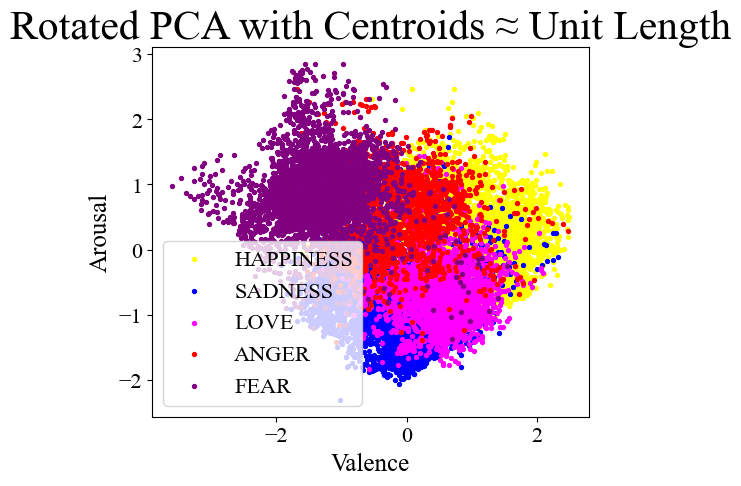

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample color mapping
color_map = {
    'HAPPINESS': 'yellow',
    'ANGER': 'red',
    'SADNESS': 'blue',
    'LOVE': 'magenta',
    'FEAR': 'purple'
}

# Assume df, R, X_mean, Y_mean exist
X_data = df[["PC1", "PC2"]].to_numpy().T

# Rotate data
X_centered = X_data - X_mean
X_rotated = R @ X_centered + Y_mean

# === NORMALIZE SO CENTROIDS LIE ~ON UNIT CIRCLE ===
# Compute emotion centroids
centroids = []
for emotion in df['EmotionLabel'].unique():
    idx = df.index[df['EmotionLabel'] == emotion]
    centroid = X_rotated[:, idx].mean(axis=1)
    centroids.append(centroid)
centroids = np.stack(centroids, axis=1)  # shape: (2, num_emotions)

# Compute mean Euclidean length of centroids
centroid_norms = np.linalg.norm(centroids, axis=0)
scale = 1.0 / np.mean(centroid_norms)

# Apply scaling to all data
X_rotated_normalized = X_rotated * scale

# === PLOT NORMALIZED ROTATED PCA DATA ===
plt.figure()
for emotion in df['EmotionLabel'].unique():
    subset = df[df['EmotionLabel'] == emotion]
    idx = subset.index
    plt.scatter(
        X_rotated_normalized[0, idx],
        X_rotated_normalized[1, idx],
        color=color_map[emotion],
        label=emotion,
        s=8
    )
plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.title("Rotated PCA with Centroids ≈ Unit Length")
plt.legend()
plt.gca().set_aspect('equal')
plt.show()


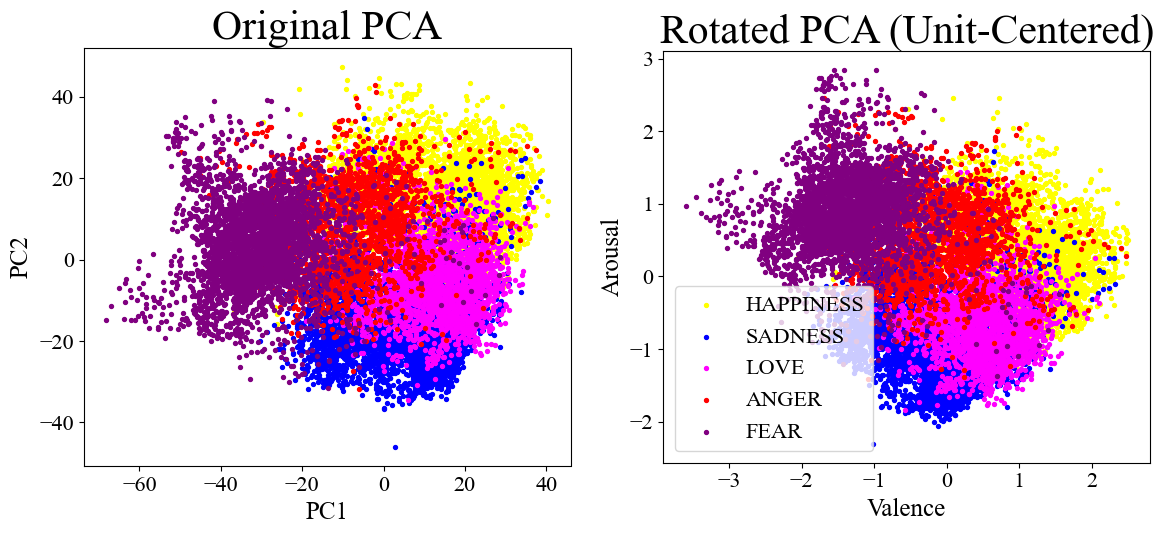

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample color mapping
color_map = {
    'HAPPINESS': 'yellow',
    'ANGER': 'red',
    'SADNESS': 'blue',
    'LOVE': 'magenta',
    'FEAR': 'purple'
}

# Assume df, R, X_mean, Y_mean exist
X_data = df[["PC1", "PC2"]].to_numpy().T

# Rotate and normalize data
X_centered = X_data - X_mean
X_rotated = R @ X_centered + Y_mean

# Compute emotion centroids for normalization
centroids = []
for emotion in df['EmotionLabel'].unique():
    idx = df.index[df['EmotionLabel'] == emotion]
    centroid = X_rotated[:, idx].mean(axis=1)
    centroids.append(centroid)
centroids = np.stack(centroids, axis=1)  # shape: (2, num_emotions)

# Normalize so centroids lie ~on unit circle
centroid_norms = np.linalg.norm(centroids, axis=0)
scale = 1.0 / np.mean(centroid_norms)
X_rotated_normalized = X_rotated * scale

# === PLOT BOTH VIEWS ===
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot original PCA
for emotion in df['EmotionLabel'].unique():
    subset = df[df['EmotionLabel'] == emotion]
    idx = subset.index
    axes[0].scatter(
        X_data[0, idx],
        X_data[1, idx],
        color=color_map[emotion],
        label=emotion,
        s=8
    )
axes[0].set_title("Original PCA")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].set_aspect('equal')

# Plot rotated + normalized
for emotion in df['EmotionLabel'].unique():
    subset = df[df['EmotionLabel'] == emotion]
    idx = subset.index
    axes[1].scatter(
        X_rotated_normalized[0, idx],
        X_rotated_normalized[1, idx],
        color=color_map[emotion],
        label=emotion,
        s=8
    )
axes[1].set_title("Rotated PCA (Unit-Centered)")
axes[1].set_xlabel("Valence")
axes[1].set_ylabel("Arousal")
axes[1].set_aspect('equal')

# Add legend once
axes[1].legend()

plt.tight_layout()
plt.show()


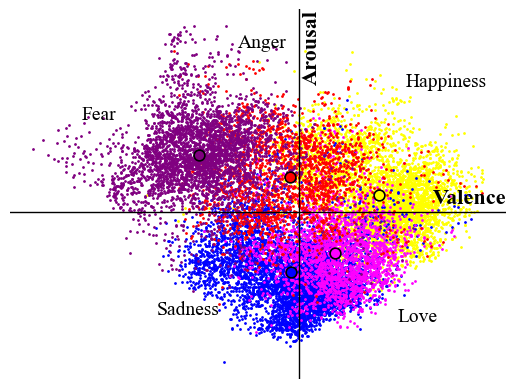

In [28]:
plt.figure()
ax = plt.gca()
plt.rcParams["font.family"] = "Times New Roman"

# Plot all points
for emotion in df['EmotionLabel'].unique():
    subset = df[df['EmotionLabel'] == emotion]
    idx = subset.index
    plt.scatter(
        X_rotated_normalized[0, idx],
        X_rotated_normalized[1, idx],
        color=color_map[emotion],
        s=1,
        label=emotion
    )

# Plot centroids
for emotion in df['EmotionLabel'].unique():
    idx = df.index[df['EmotionLabel'] == emotion]
    centroid = X_rotated_normalized[:, idx].mean(axis=1)
    plt.scatter(
        centroid[0], centroid[1],
        facecolor=color_map[emotion],
        edgecolor='black',
        s=60,
        linewidth=1.2
    )

# Manual label positions
label_positions = {
    "ANGER":     (-.5, 2.6),
    "FEAR":      (-2.7, 1.5),
    "HAPPINESS": (2, 2),
    "LOVE":      (1.6, -1.6),
    "SADNESS":   (-1.5, -1.5)
}

# Emotion labels
for emotion in df['EmotionLabel'].unique():
    idx = df.index[df['EmotionLabel'] == emotion]
    centroid = X_rotated_normalized[:, idx].mean(axis=1)

    if emotion in label_positions:
        x_label, y_label = label_positions[emotion]
    else:
        theta = np.arctan2(centroid[1], centroid[0])
        outer_radius = 1.2
        x_label = outer_radius * np.cos(theta)
        y_label = outer_radius * np.sin(theta)

    plt.text(
        x_label, y_label,
        emotion.capitalize(),
        fontsize=14, color='black',
        ha='center', va='center'
    )

# Clean up plot
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# Origin axes
ax.axhline(0, color='black', linewidth=1, xmin=-0.05, xmax=1.10)
ax.axvline(0, color='black', linewidth=1, ymin=-0.05, ymax=1.10)

# Axis labels
ax.text(
    ax.get_xlim()[1], 0.05, "Valence",
    fontsize=16, ha='right', va='bottom', fontweight='black'
)

ax.text(
    0.05, ax.get_ylim()[1], "Arousal",
    fontsize=16, ha='left', va='top', rotation='vertical', fontweight='black'
)

plt.show()


In [29]:
import pandas as pd
import numpy as np

# Input and output paths
input_csv = "/Users/joshualunger/deepemotion_variance_01/PCA/hidden/sub_ALL_new.csv"
output_csv = "/Users/joshualunger/deepemotion_variance_01/PCA/hidden/sub_ALL_procrustes.csv"

# 1) Read CSV
df = pd.read_csv(input_csv)

# 2) Compute centroids from existing PC1, PC2
grouped = df.groupby("EmotionLabel")[["PC1", "PC2"]].mean().sort_index()
emotions = grouped.index.tolist()  # Ensure consistent ordering

# 3) Build X (2xN) for your data's centroids
X = grouped[["PC1", "PC2"]].to_numpy().T  # shape: (2, number_of_emotions)

# 4) Define canonical valence-arousal coordinates for each emotion
#    (Adjust if your canonical positions are different)
canonical_positions = {
    "ANGER":     (0, 1),
    "FEAR":      (-2, 1),
    "HAPPINESS": (1, 1),
    "LOVE":      (1, -1),
    "SADNESS":   (-1, 1)
}

# 5) Normalize these canonical positions to lie on ~unit circle
normalized_positions = {}
for emotion, pos in canonical_positions.items():
    arr = np.array(pos, dtype=float)
    norm = np.linalg.norm(arr)
    normalized_positions[emotion] = arr / norm

# 6) Build Y (2xN) in the same emotion order as X
Y = np.array([normalized_positions[e] for e in emotions]).T  # shape: (2, number_of_emotions)

# 7) Perform Procrustes alignment (rotation + translation, optional reflection)
#    a) Center both sets
X_mean = X.mean(axis=1, keepdims=True)
Y_mean = Y.mean(axis=1, keepdims=True)
X_centered = X - X_mean
Y_centered = Y - Y_mean

#    b) Find optimal rotation with SVD
M = Y_centered @ X_centered.T
U, _, Vt = np.linalg.svd(M)
R = U @ Vt  # 2x2 rotation/reflection

#    c) (Optional) Enforce det(R)=1 if you want pure rotation. Uncomment below if desired:
# if np.linalg.det(R) < 0:
#     U[:, -1] *= -1
#     R = U @ Vt

# 8) Compute scale so that the average distance of the final centroids ~matches Y
#    This step maps the average distance of X to the average distance of Y
#    But since you specifically want them ~unit circle, we can scale so the
#    *transformed X* centroids match Y's scale exactly.
X_transformed = R @ X_centered
scale_factor = np.sum(Y_centered * X_transformed) / np.sum(X_transformed**2)

# 9) Apply rotation + translation + scale to *all points* in df
X_data = df[["PC1", "PC2"]].to_numpy().T          # shape: (2, total_points)
X_data_centered = X_data - X_mean                 # center by original X centroids
X_data_rotated  = R @ X_data_centered             # rotate
X_data_final    = (scale_factor * X_data_rotated) + Y_mean  # scale and translate to final coords

# 10) (Optional) If you want the final centroids on the exact unit circle,
#     you can do the same "1.0 / np.mean(centroid_norms)" approach. 
#     This is your additional normalization step from the snippet:
centroids_rotated = []
for emotion in emotions:
    idx = df.index[df['EmotionLabel'] == emotion]
    coords = X_data_final[:, idx].mean(axis=1)
    centroids_rotated.append(coords)
centroids_rotated = np.stack(centroids_rotated, axis=1)  # shape: (2, number_of_emotions)

# Compute mean radius of the centroids
centroid_norms = np.linalg.norm(centroids_rotated, axis=0)
circle_scale = 1.0 / np.mean(centroid_norms)

# Apply that final scaling
X_data_final = X_data_final * circle_scale

# 11) Write back into DataFrame
df["PC1"] = X_data_final[0, :]
df["PC2"] = X_data_final[1, :]

# 12) Save new CSV with the same columns (PC1, PC2, EmotionLabel, time_offset, subject, etc.)
df.to_csv(output_csv, index=False)

print(f"Saved Procrustes-aligned data to {output_csv}")


Saved Procrustes-aligned data to /Users/joshualunger/deepemotion_variance_01/PCA/hidden/sub_ALL_procrustes.csv


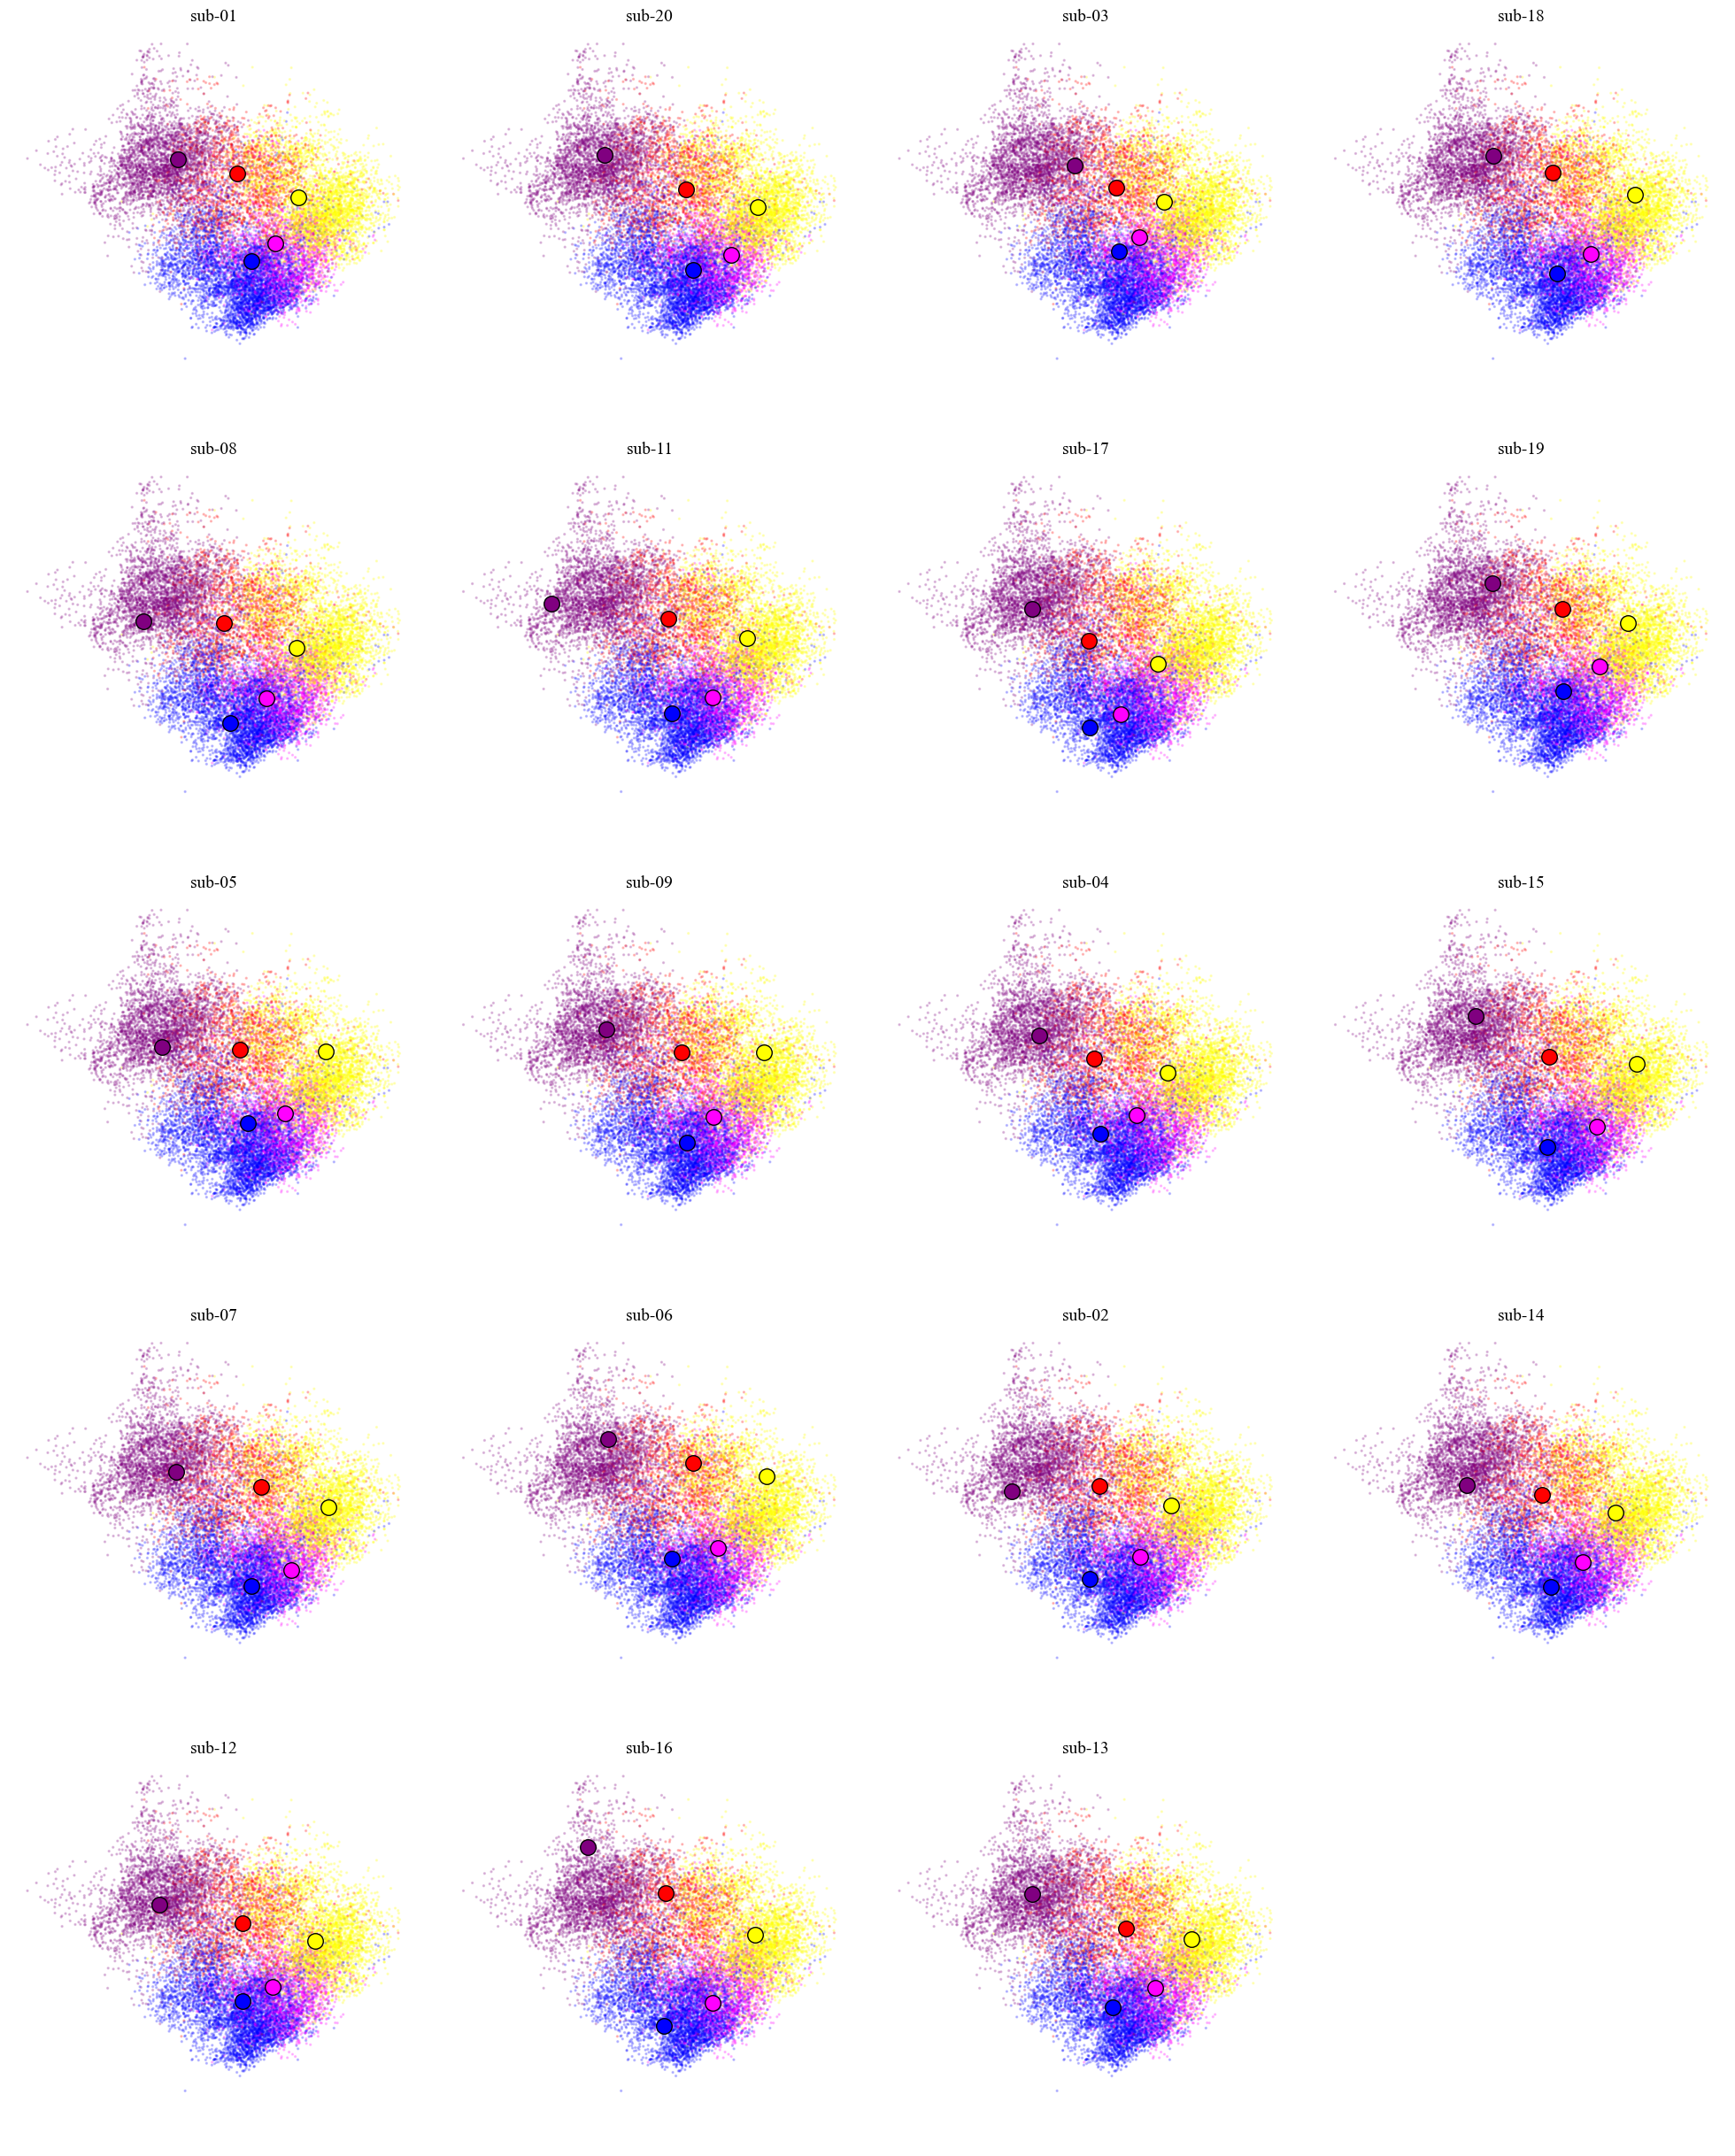

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assume df_procrustes is your Procrustes-aligned DataFrame:
# It has columns: PC1, PC2, EmotionLabel, time_offset, subject
# color_map already defined:
# color_map = {
#     'HAPPINESS': 'yellow',
#     'ANGER': 'red',
#     'SADNESS': 'blue',
#     'LOVE': 'magenta',
#     'FEAR': 'purple'
# }

def plot_subject_centroids(df, color_map, max_subplots=19):
    subjects = df['subject'].unique()
    
    # Prepare figure with 19 subplots (5 rows x 4 cols = 20 subplots, but we'll only fill 19)
    fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))
    axes = axes.flatten()  # flatten into 1D list of axes

    # Convert all points to a NumPy array for fast plotting
    X_all = df[['PC1', 'PC2']].to_numpy().T
    colors_all = [color_map.get(e, 'gray') for e in df['EmotionLabel']]

    # Loop over up to 19 subjects
    for i, subject in enumerate(subjects[:max_subplots]):
        ax = axes[i]

        # 1) Plot the entire dataset
        ax.scatter(
            X_all[0],
            X_all[1],
            color=colors_all,
            s=2,
            alpha=0.2  # Adjust as needed to lighten the background
        )

        # 2) Overlay centroids just for this subject
        #    (one centroid per emotion for the current subject)
        for emotion in df['EmotionLabel'].unique():
            subset = df[(df['subject'] == subject) & (df['EmotionLabel'] == emotion)]
            if not subset.empty:
                x_mean = subset['PC1'].mean()
                y_mean = subset['PC2'].mean()
                ax.scatter(
                    x_mean, y_mean,
                    facecolor=color_map.get(emotion, 'gray'),
                    edgecolor='black',
                    s=160,
                    linewidth=1.0
                )

        # Title with subject ID
        ax.set_title(str(subject), fontsize=14)

        # Remove axis ticks, labels, spines
        ax.set_xticks([])
        ax.set_yticks([])
        ax.axis('off')
        ax.set_aspect('equal')

    # Hide any extra subplots if we have fewer than 19 subjects
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage (adjust to your data):
df_procrustes = pd.read_csv("/Users/joshualunger/deepemotion_variance_01/PCA/hidden/sub_ALL_procrustes.csv")
plot_subject_centroids(df_procrustes, color_map)


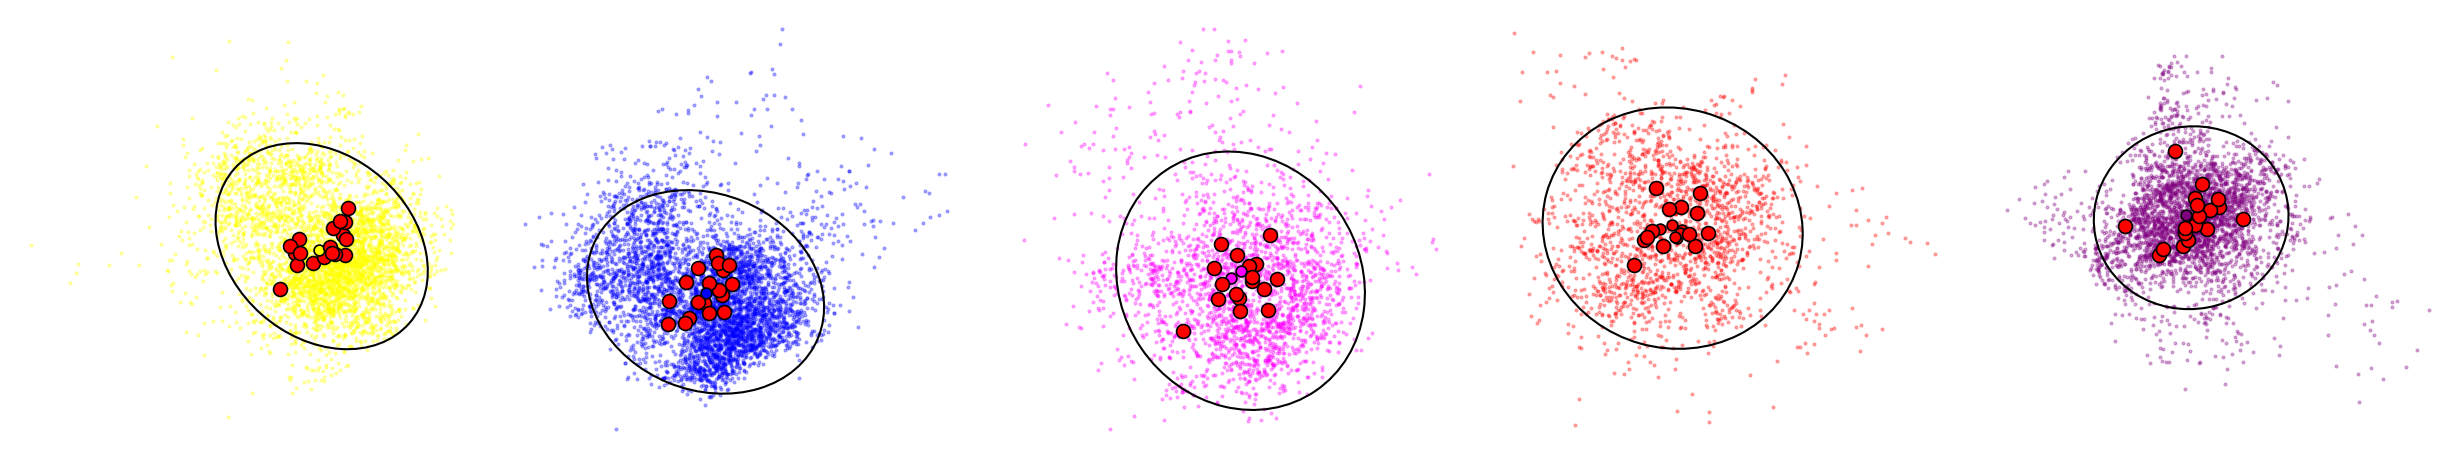

In [59]:
# Jupyter/IPython cell

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Assume df_procrustes is your Procrustes-aligned DataFrame, with:
#   PC1, PC2, EmotionLabel, time_offset, subject
# And assume a color_map is defined, e.g.:
# color_map = {
#     'HAPPINESS': 'yellow',
#     'ANGER': 'red',
#     'SADNESS': 'blue',
#     'LOVE': 'magenta',
#     'FEAR': 'purple'
# }

# --- Helper to plot the 2-std ellipse for a 2D Gaussian ---
def plot_cov_ellipse(mean, cov, ax, n_std=2.0, **kwargs):
    """
    Plots an ellipse representing the n_std contour of a 2D Gaussian with given mean, cov.
    mean: [2,] array-like
    cov: [2, 2] array-like
    ax: matplotlib axis
    n_std: number of standard deviations
    kwargs: properties forwarded to Ellipse patch
    """
    # Eigen-decomposition of covariance
    vals, vecs = np.linalg.eigh(cov)
    # Sort eigenvalues (largest first)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]

    # Ellipse radii (for n_std) along each eigenvector
    width, height = 2 * n_std * np.sqrt(vals)

    # Ellipse rotation in degrees
    # Angle is the orientation of the largest eigenvector
    angle = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Draw the ellipse
    ell = Ellipse(xy=mean, width=width, height=height,
                  angle=angle, fill=False, **kwargs)
    ax.add_patch(ell)

def mahalanobis_dist(x, mean, cov):
    """Compute squared Mahalanobis distance of point x from Gaussian(mean, cov)."""
    diff = x - mean
    inv_cov = np.linalg.inv(cov)
    return diff.T @ inv_cov @ diff  # returns a scalar

# --- Main plotting code ---
def plot_gaussians_with_subject_centroids(df, color_map):
    emotions = df['EmotionLabel'].unique()
    
    # Make one subplot per emotion
    fig, axes = plt.subplots(1, len(emotions), figsize=(5*len(emotions), 5))
    
    if len(emotions) == 1:
        # If there's only one emotion in data, make it iterable
        axes = [axes]
    
    for ax, emotion in zip(axes, emotions):
        # Subset of data for this emotion (all subjects)
        subset = df[df['EmotionLabel'] == emotion]

        # 1) Plot all data points for this emotion
        ax.scatter(
            subset['PC1'], subset['PC2'],
            color=color_map.get(emotion, 'gray'),
            s=4, alpha=0.3
        )

        # 2) Fit Gaussian: compute mean and 2x2 covariance
        data_mat = subset[['PC1', 'PC2']].to_numpy()
        mean = data_mat.mean(axis=0)
        cov = np.cov(data_mat.T)

        # 3) Plot the 2-std ellipse
        plot_cov_ellipse(mean, cov, ax, n_std=2.0, edgecolor='black', linewidth=1.5)

        # 4) Plot each subject's centroid for this emotion
        subjects_for_emotion = df[df['EmotionLabel'] == emotion]['subject'].unique()
        for subj in subjects_for_emotion:
            subj_data = df[(df['EmotionLabel'] == emotion) & (df['subject'] == subj)]
            if not subj_data.empty:
                # Centroid for that subject & emotion
                cx = subj_data['PC1'].mean()
                cy = subj_data['PC2'].mean()
                
                # Check Mahalanobis distance
                n = len(subj_data)
                m_dist = n * mahalanobis_dist(np.array([cx, cy]), mean, cov)

                # If it's > (2 std dev)^2 = 4 in 2D, highlight in bold red
                # (Strictly, the 2D "2σ ellipse" is where (x-μ)ᵀΣ⁻¹(x-μ) = 2², i.e. 4.)
                if m_dist > 4.0:
                    face_color = 'red'
                    size = 100
                else:
                    face_color = color_map.get(emotion, 'gray')
                    size = 60

                ax.scatter(
                    cx, cy,
                    facecolor=face_color,
                    edgecolor='black',
                    s=size,
                    linewidth=1.2
                )

        # ax.set_title(f"Emotion: {emotion}", fontsize=12)
        ax.axis('off')
        ax.set_aspect('equal')
    
    plt.tight_layout()
    plt.show()

# Example usage
df_procrustes = pd.read_csv("/Users/joshualunger/deepemotion_variance_01/PCA/hidden/sub_ALL_procrustes.csv")
plot_gaussians_with_subject_centroids(df_procrustes, color_map)


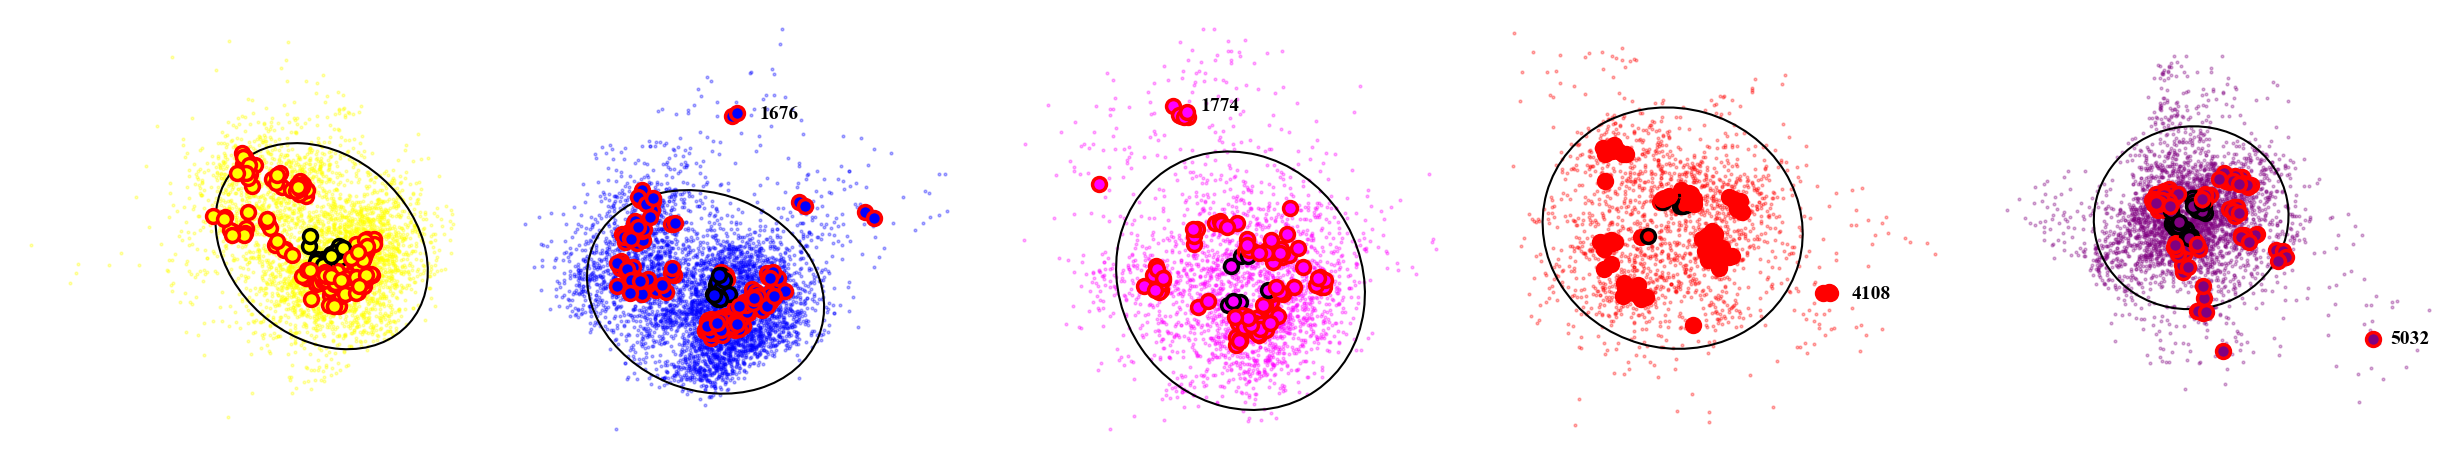

Anomalous centroids (outside 2σ):
time_offset: 366, emotion: ANGER
time_offset: 368, emotion: ANGER
time_offset: 370, emotion: ANGER
time_offset: 434, emotion: LOVE
time_offset: 438, emotion: LOVE
time_offset: 440, emotion: LOVE
time_offset: 442, emotion: LOVE
time_offset: 446, emotion: LOVE
time_offset: 580, emotion: SADNESS
time_offset: 582, emotion: SADNESS
time_offset: 660, emotion: HAPPINESS
time_offset: 662, emotion: HAPPINESS
time_offset: 668, emotion: HAPPINESS
time_offset: 718, emotion: LOVE
time_offset: 756, emotion: ANGER
time_offset: 758, emotion: SADNESS
time_offset: 810, emotion: LOVE
time_offset: 812, emotion: LOVE
time_offset: 902, emotion: ANGER
time_offset: 904, emotion: ANGER
time_offset: 906, emotion: ANGER
time_offset: 908, emotion: ANGER
time_offset: 910, emotion: ANGER
time_offset: 912, emotion: ANGER
time_offset: 914, emotion: ANGER
time_offset: 916, emotion: ANGER
time_offset: 918, emotion: ANGER
time_offset: 920, emotion: ANGER
time_offset: 922, emotion: ANGER

In [56]:
# Jupyter/IPython cell

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def plot_cov_ellipse(mean, cov, ax, n_std=2.0, **kwargs):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]
    width, height = 2 * n_std * np.sqrt(vals)
    angle = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    ell = Ellipse(xy=mean, width=width, height=height,
                  angle=angle, fill=False, **kwargs)
    ax.add_patch(ell)

def mahalanobis_dist(x, mean, cov):
    diff = x - mean
    inv_cov = np.linalg.inv(cov)
    return diff.T @ inv_cov @ diff

def plot_gaussians_with_centroids_by_timeoffset(df, color_map):
    emotions = df['EmotionLabel'].unique()
    
    fig, axes = plt.subplots(1, len(emotions), figsize=(5 * len(emotions), 5))
    if len(emotions) == 1:
        axes = [axes]
    
    anomalies = []
    label_targets = {}

    for ax, emotion in zip(axes, emotions):
        emotion_df = df[df['EmotionLabel'] == emotion]
        ax.scatter(
            emotion_df['PC1'], emotion_df['PC2'],
            color=color_map.get(emotion, 'gray'),
            s=4, alpha=0.3
        )

        data_mat = emotion_df[['PC1', 'PC2']].to_numpy()
        mean = data_mat.mean(axis=0)
        cov = np.cov(data_mat.T)

        plot_cov_ellipse(mean, cov, ax, n_std=2.0, edgecolor='black', linewidth=1.5)

        centroids = []
        for offset in emotion_df['time_offset'].unique():
            offset_data = emotion_df[emotion_df['time_offset'] == offset]
            cx, cy = offset_data['PC1'].mean(), offset_data['PC2'].mean()
            centroids.append((offset, cx, cy))

            n = len(offset_data)
            m_dist = n * mahalanobis_dist(np.array([cx, cy]), mean, cov)

            edge = 'red' if m_dist > 4.0 else 'black'
            if m_dist > 4.0:
                anomalies.append((offset, emotion))

            ax.scatter(
                cx, cy,
                facecolor=color_map.get(emotion, 'gray'),
                edgecolor=edge,
                s=100,
                linewidth=2.5
            )

        # Track special label targets
        if emotion == "SADNESS":
            max_y = max(centroids, key=lambda x: x[2])
            label_targets["SADNESS"] = max_y
        elif emotion == "LOVE":
            max_y = max(centroids, key=lambda x: x[2])
            label_targets["LOVE"] = max_y
        elif emotion == "FEAR":
            max_x = max(centroids, key=lambda x: x[1])
            label_targets["FEAR"] = max_x
        elif emotion == "ANGER":
            max_x = max(centroids, key=lambda x: x[1])
            label_targets["ANGER"] = max_x
        elif emotion == "ANGERRAGE":
            max_x = max(centroids, key=lambda x: x[1])
            label_targets["ANGERRAGE"] = max_x

        # ax.set_title(f"Emotion: {emotion}", fontsize=12)
        ax.axis('off')
        ax.set_aspect('equal')

    # Annotate the selected centroids
    for emotion, (offset, x, y) in label_targets.items():
        ax_idx = list(emotions).index(emotion)
        ax = axes[ax_idx]
        ax.text(
            x + 0.2, y,
            str(offset),
            fontsize=14, color='black', weight='bold',
            va='center', ha='left'
        )

    plt.tight_layout()
    plt.show()

    print("Anomalous centroids (outside 2σ):")
    for offset, emotion in sorted(anomalies):
        print(f"time_offset: {offset}, emotion: {emotion}")

# Example usage
df_procrustes = pd.read_csv("/Users/joshualunger/deepemotion_variance_01/PCA/hidden/sub_ALL_procrustes.csv")
plot_gaussians_with_centroids_by_timeoffset(df_procrustes, color_map)


In [20]:
# === Construct dictionary of normalized rotated centroids ===
sub_ALL_centroids = {}

for emotion in df['EmotionLabel'].unique():
    idx = df.index[df['EmotionLabel'] == emotion]
    centroid = X_rotated_normalized[:, idx].mean(axis=1)
    normalized_centroid = centroid * scale  # apply the same normalization
    sub_ALL_centroids[emotion] = tuple(normalized_centroid)

# Optional: inspect the result
for emotion, coord in sub_ALL_centroids.items():
    print(f"{emotion}: Valence = {coord[0]:.3f}, Arousal = {coord[1]:.3f}")


FEAR: Valence = -0.065, Arousal = 0.042
HAPPINESS: Valence = 0.052, Arousal = 0.019
SADNESS: Valence = -0.005, Arousal = -0.040
LOVE: Valence = 0.027, Arousal = -0.041
ANGER: Valence = -0.010, Arousal = 0.025


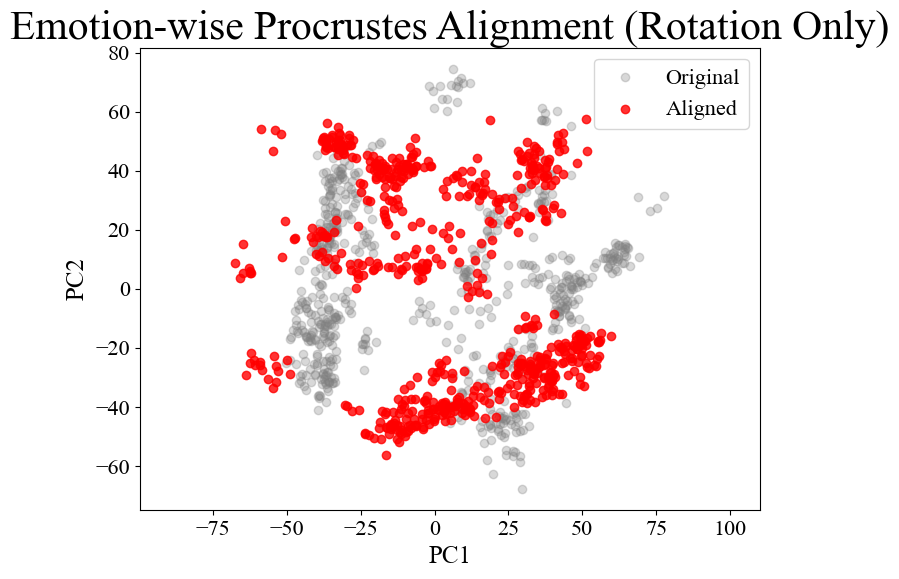

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Input ---
csv_path = "/Users/joshualunger/deepemotion_variance_01/PCA/hidden/sub_01.csv"

# --- Load subject data ---
df_sub = pd.read_csv(csv_path)

# --- Compute centroids for each emotion present in both the CSV and the canonical map ---
emotions = [e for e in df_sub['EmotionLabel'].unique() if e in sub_ALL_centroids]

# Collect observed and target centroids
observed_centroids = []
target_centroids = []

for emotion in emotions:
    pts = df_sub[df_sub['EmotionLabel'] == emotion][['PC1', 'PC2']].to_numpy()
    obs_centroid = pts.mean(axis=0)
    tgt_centroid = np.array(sub_ALL_centroids[emotion])
    
    observed_centroids.append(obs_centroid)
    target_centroids.append(tgt_centroid)

observed_centroids = np.vstack(observed_centroids)  # shape: (n_emotions, 2)
target_centroids = np.vstack(target_centroids)      # shape: (n_emotions, 2)

# --- Center both centroid sets at origin ---
obs_mean = observed_centroids.mean(axis=0)
tgt_mean = target_centroids.mean(axis=0)

A = observed_centroids - obs_mean
B = target_centroids - tgt_mean

# --- Compute rotation matrix using orthogonal Procrustes ---
U, _, Vt = np.linalg.svd(A.T @ B)
R = Vt.T @ U.T

# Ensure proper rotation (determinant = +1)
if np.linalg.det(R) < 0:
    Vt[-1, :] *= -1
    R = Vt.T @ U.T

# --- Apply rotation to all subject data (centered first) ---
X = df_sub[['PC1', 'PC2']].to_numpy()
X_centered = X - obs_mean
X_rotated = (R @ X_centered.T).T + tgt_mean  # rotate and re-center to canonical space

# --- Add result to DataFrame ---
df_sub['PC1_aligned'] = X_rotated[:, 0]
df_sub['PC2_aligned'] = X_rotated[:, 1]

# --- Optional plot ---
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label='Original', color='gray')
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], alpha=0.8, label='Aligned', color='red')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Emotion-wise Procrustes Alignment (Rotation Only)")
plt.legend()
plt.axis('equal')
plt.show()


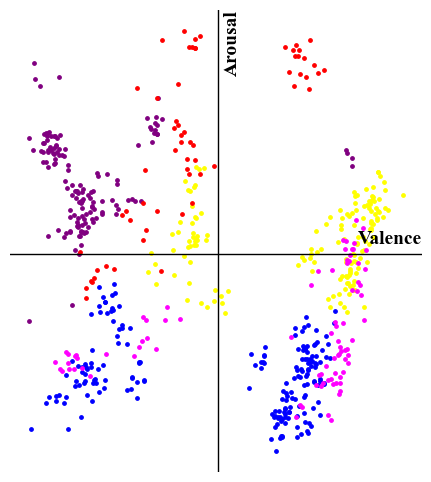

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Input ---
csv_path = "/Users/joshualunger/deepemotion_variance_01/PCA/hidden/sub_01.csv"

# --- Load subject data ---
df_sub = pd.read_csv(csv_path)

# --- Emotion color map ---
color_map = {
    'HAPPINESS': 'yellow',
    'ANGER': 'red',
    'SADNESS': 'blue',
    'LOVE': 'magenta',
    'FEAR': 'purple'
}

# --- Build centroids ---
emotions = [e for e in df_sub['EmotionLabel'].unique() if e in sub_ALL_centroids]

observed_centroids = []
target_centroids = []

for emotion in emotions:
    pts = df_sub[df_sub['EmotionLabel'] == emotion][['PC1', 'PC2']].to_numpy()
    obs_centroid = pts.mean(axis=0)
    tgt_centroid = np.array(sub_ALL_centroids[emotion])
    
    observed_centroids.append(obs_centroid)
    target_centroids.append(tgt_centroid)

observed_centroids = np.vstack(observed_centroids)
target_centroids = np.vstack(target_centroids)

# --- Compute rotation matrix (reflections allowed) ---
obs_mean = observed_centroids.mean(axis=0)
tgt_mean = target_centroids.mean(axis=0)

A = observed_centroids - obs_mean
B = target_centroids - tgt_mean

U, _, Vt = np.linalg.svd(A.T @ B)
R = Vt.T @ U.T  # reflections allowed

# --- Apply rotation to full subject data ---
X = df_sub[['PC1', 'PC2']].to_numpy()
X_centered = X - obs_mean
X_rotated = (R @ X_centered.T).T + tgt_mean

# --- Normalize by mean centroid norm so that aligned centroids ≈ unit circle ---
aligned_centroids = []
for emotion in emotions:
    idx = df_sub.index[df_sub['EmotionLabel'] == emotion]
    centroid = X_rotated[idx].mean(axis=0)
    aligned_centroids.append(centroid)
aligned_centroids = np.vstack(aligned_centroids)
scale = 1.0 / np.mean(np.linalg.norm(aligned_centroids, axis=1))

X_rotated_normalized = X_rotated * scale
df_sub['PC1_aligned'] = X_rotated_normalized[:, 0]
df_sub['PC2_aligned'] = X_rotated_normalized[:, 1]

# --- Plot: Aligned & Normalized with clean axes ---
plt.figure(figsize=(6, 6))
ax = plt.gca()

for emotion in df_sub['EmotionLabel'].unique():
    subset = df_sub[df_sub['EmotionLabel'] == emotion]
    plt.scatter(subset['PC1_aligned'], subset['PC2_aligned'], s=6, color=color_map[emotion], label=emotion)

# Remove ticks and box
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

# Draw X and Y axis lines through origin
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)

# Custom axis labels
ax.text(
    ax.get_xlim()[1], 0.05, "Valence",
    fontsize=14, ha='right', va='bottom', fontweight='black'
)
ax.text(
    0.05, ax.get_ylim()[1], "Arousal",
    fontsize=14, ha='left', va='top', rotation='vertical', fontweight='black'
)

ax.set_aspect('equal')
plt.show()


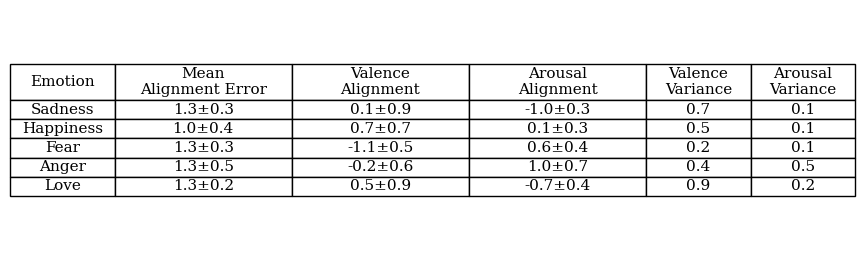

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use LaTeX-style serif font
plt.rcParams["font.family"] = "serif"
plt.rcParams["text.usetex"] = False

# Table header with descriptive labels
table_data = [
    [
        "Emotion",
        "Mean\nAlignment Error",
        "Valence\nAlignment",
        "Arousal\nAlignment",
        "Valence\nVariance",
        "Arousal\nVariance"
    ]
]

def camelcase(s):
    return s.capitalize() if s.isupper() else s

# Compute stats from aligned data relative to sub_ALL_centroids
for emotion in df_sub['EmotionLabel'].unique():
    if emotion not in sub_ALL_centroids:
        continue

    subset = df_sub[df_sub['EmotionLabel'] == emotion]
    n = len(subset)
    if n <= 1:
        continue

    # Extract aligned data
    Y_emotion = np.stack([
        subset['PC1_aligned'].to_numpy(),
        subset['PC2_aligned'].to_numpy()
    ])

    # Target centroid
    target = np.array(sub_ALL_centroids[emotion]).reshape(2, 1)

    # Difference to target
    diff = Y_emotion - target

    # Euclidean alignment error
    eucl_dist = np.linalg.norm(diff, axis=0)
    mean_eucl = np.mean(eucl_dist)
    std_eucl = np.std(eucl_dist, ddof=1)

    # Component-wise deviation
    compwise_mean = np.mean(diff, axis=1)
    compwise_std = np.std(diff, axis=1, ddof=1)

    # Component-wise variance
    compwise_var = [np.var(Y_emotion[i, :], ddof=1) for i in range(2)]

    row = [
        camelcase(emotion),
        f"{mean_eucl:.1f}±{std_eucl:.1f}",
        f"{compwise_mean[0]:.1f}±{compwise_std[0]:.1f}",  # Valence
        f"{compwise_mean[1]:.1f}±{compwise_std[1]:.1f}",  # Arousal
        f"{compwise_var[0]:.1f}",  # Valence variance
        f"{compwise_var[1]:.1f}"   # Arousal variance
    ]
    table_data.append(row)

# Render styled table
fig, ax = plt.subplots(figsize=(9, 0.6 + 0.4 * len(table_data)))
ax.axis('off')

table = ax.table(
    cellText=table_data,
    loc='center',
    cellLoc='center',
    colWidths=[0.13, 0.22, 0.22, 0.22, 0.13, 0.13]
)

table.auto_set_font_size(False)
table.set_fontsize(11)

for (row, col), cell in table.get_celld().items():
    cell.set_edgecolor('black')
    cell.set_linewidth(1.0)
    cell.set_height(0.15 if row == 0 else 0.08)

plt.tight_layout()
plt.show()


In [26]:
import os
import pandas as pd
import numpy as np

aligned_subjects = {}

for subj_id in range(1, 20):  # subjects 1 to 19 inclusive
    # --- Load ---
    subj_str = f"sub_{subj_id:02d}"
    csv_path = f"/Users/joshualunger/deepemotion_variance_01/PCA/hidden/{subj_str}.csv"
    df_sub = pd.read_csv(csv_path)

    # --- Compute centroids from subject ---
    emotions = [e for e in df_sub['EmotionLabel'].unique() if e in sub_ALL_centroids]
    if not emotions:
        continue

    observed_centroids = []
    target_centroids = []

    for emotion in emotions:
        pts = df_sub[df_sub['EmotionLabel'] == emotion][['PC1', 'PC2']].to_numpy()
        obs_centroid = pts.mean(axis=0)
        tgt_centroid = np.array(sub_ALL_centroids[emotion])

        observed_centroids.append(obs_centroid)
        target_centroids.append(tgt_centroid)

    observed_centroids = np.vstack(observed_centroids)
    target_centroids = np.vstack(target_centroids)

    # --- Compute rotation (with reflection allowed) ---
    obs_mean = observed_centroids.mean(axis=0)
    tgt_mean = target_centroids.mean(axis=0)

    A = observed_centroids - obs_mean
    B = target_centroids - tgt_mean

    U, _, Vt = np.linalg.svd(A.T @ B)
    R = Vt.T @ U.T  # reflections allowed

    # --- Apply rotation ---
    X = df_sub[['PC1', 'PC2']].to_numpy()
    X_centered = X - obs_mean
    X_rotated = (R @ X_centered.T).T + tgt_mean

    # --- Normalize centroids so they lie ~on unit circle ---
    aligned_centroids = []
    for emotion in emotions:
        idx = df_sub.index[df_sub['EmotionLabel'] == emotion]
        centroid = X_rotated[idx].mean(axis=0)
        aligned_centroids.append(centroid)
    aligned_centroids = np.vstack(aligned_centroids)
    scale = 1.0 / np.mean(np.linalg.norm(aligned_centroids, axis=1))

    X_rotated_normalized = X_rotated * scale
    df_sub['PC1_aligned'] = X_rotated_normalized[:, 0]
    df_sub['PC2_aligned'] = X_rotated_normalized[:, 1]

    # --- Store in dict ---
    aligned_subjects[subj_str] = df_sub.copy()

print(f"Aligned {len(aligned_subjects)} subjects.")


Aligned 19 subjects.


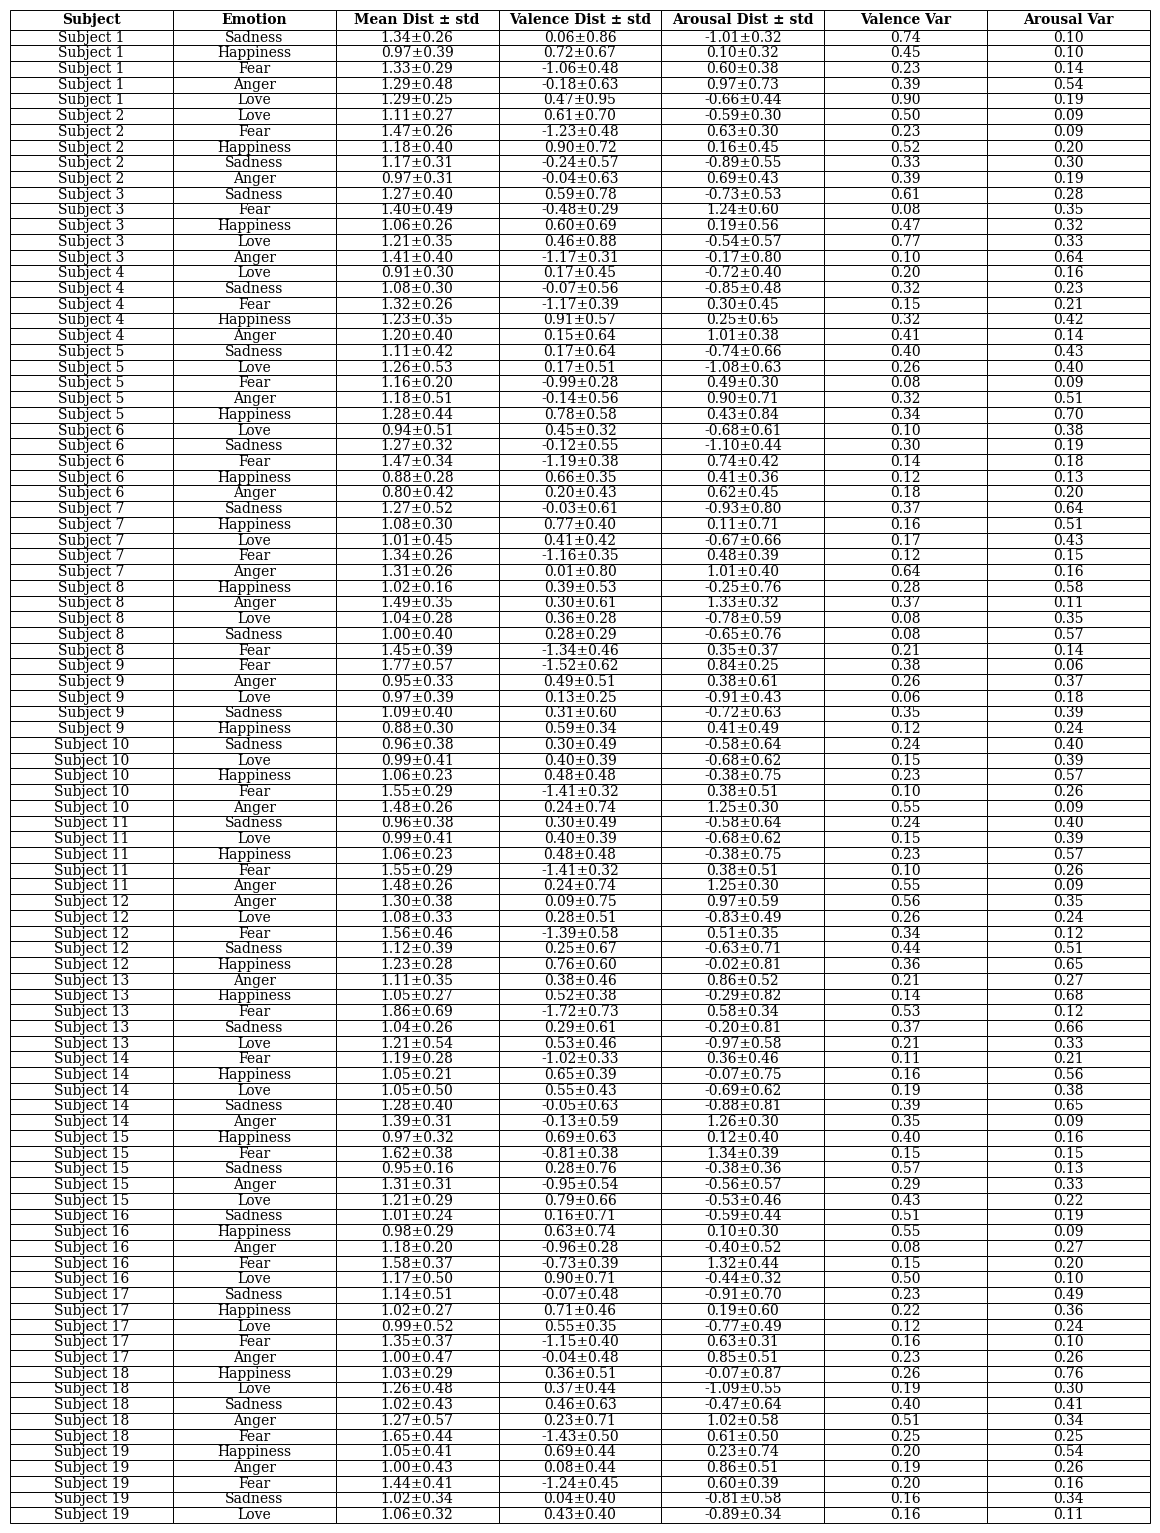

In [27]:
import scipy.stats as st
import matplotlib.pyplot as plt

# Use LaTeX-style serif font
plt.rcParams["font.family"] = "serif"
plt.rcParams["text.usetex"] = False

# Table header
table_data = [
    [
        "Subject", "Emotion",
        "Mean Dist ± std",
        "Valence Dist ± std",
        "Arousal Dist ± std",
        "Valence Var",
        "Arousal Var"
    ]
]

for subj_key, df in aligned_subjects.items():
    subj_id = int(subj_key.split("_")[1])  # extract number from sub_XX
    subj_label = f"Subject {subj_id}"

    for emotion in df['EmotionLabel'].unique():
        if emotion not in sub_ALL_centroids:
            continue

        subset = df[df['EmotionLabel'] == emotion]
        n = len(subset)
        if n <= 1:
            continue

        Y_emotion = np.stack([
            subset['PC1_aligned'].to_numpy(),
            subset['PC2_aligned'].to_numpy()
        ])
        target = np.array(sub_ALL_centroids[emotion]).reshape(2, 1)

        diff = Y_emotion - target
        eucl_dist = np.linalg.norm(diff, axis=0)
        mean_eucl = np.mean(eucl_dist)
        std_eucl = np.std(eucl_dist, ddof=1)

        compwise_mean = np.mean(diff, axis=1)
        compwise_std = np.std(diff, axis=1, ddof=1)

        compwise_var = [np.var(Y_emotion[i, :], ddof=1) for i in range(2)]

        row = [
            subj_label,
            emotion.capitalize(),
            f"{mean_eucl:.2f}±{std_eucl:.2f}",
            f"{compwise_mean[0]:.2f}±{compwise_std[0]:.2f}",  # Valence
            f"{compwise_mean[1]:.2f}±{compwise_std[1]:.2f}",  # Arousal
            f"{compwise_var[0]:.2f}",
            f"{compwise_var[1]:.2f}"
        ]
        table_data.append(row)

# Render the table
fig, ax = plt.subplots(figsize=(12, 0.6 + 0.3 * len(table_data)))
ax.axis('off')

table = ax.table(
    cellText=table_data,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)

for (row, col), cell in table.get_celld().items():
    cell.set_edgecolor('black')
    cell.set_linewidth(0.7)
    if row == 0:
        cell.set_fontsize(10)
        cell.set_text_props(weight='bold')
        cell.set_height(0.025)
    else:
        cell.set_height(0.02)

plt.tight_layout()
plt.show()


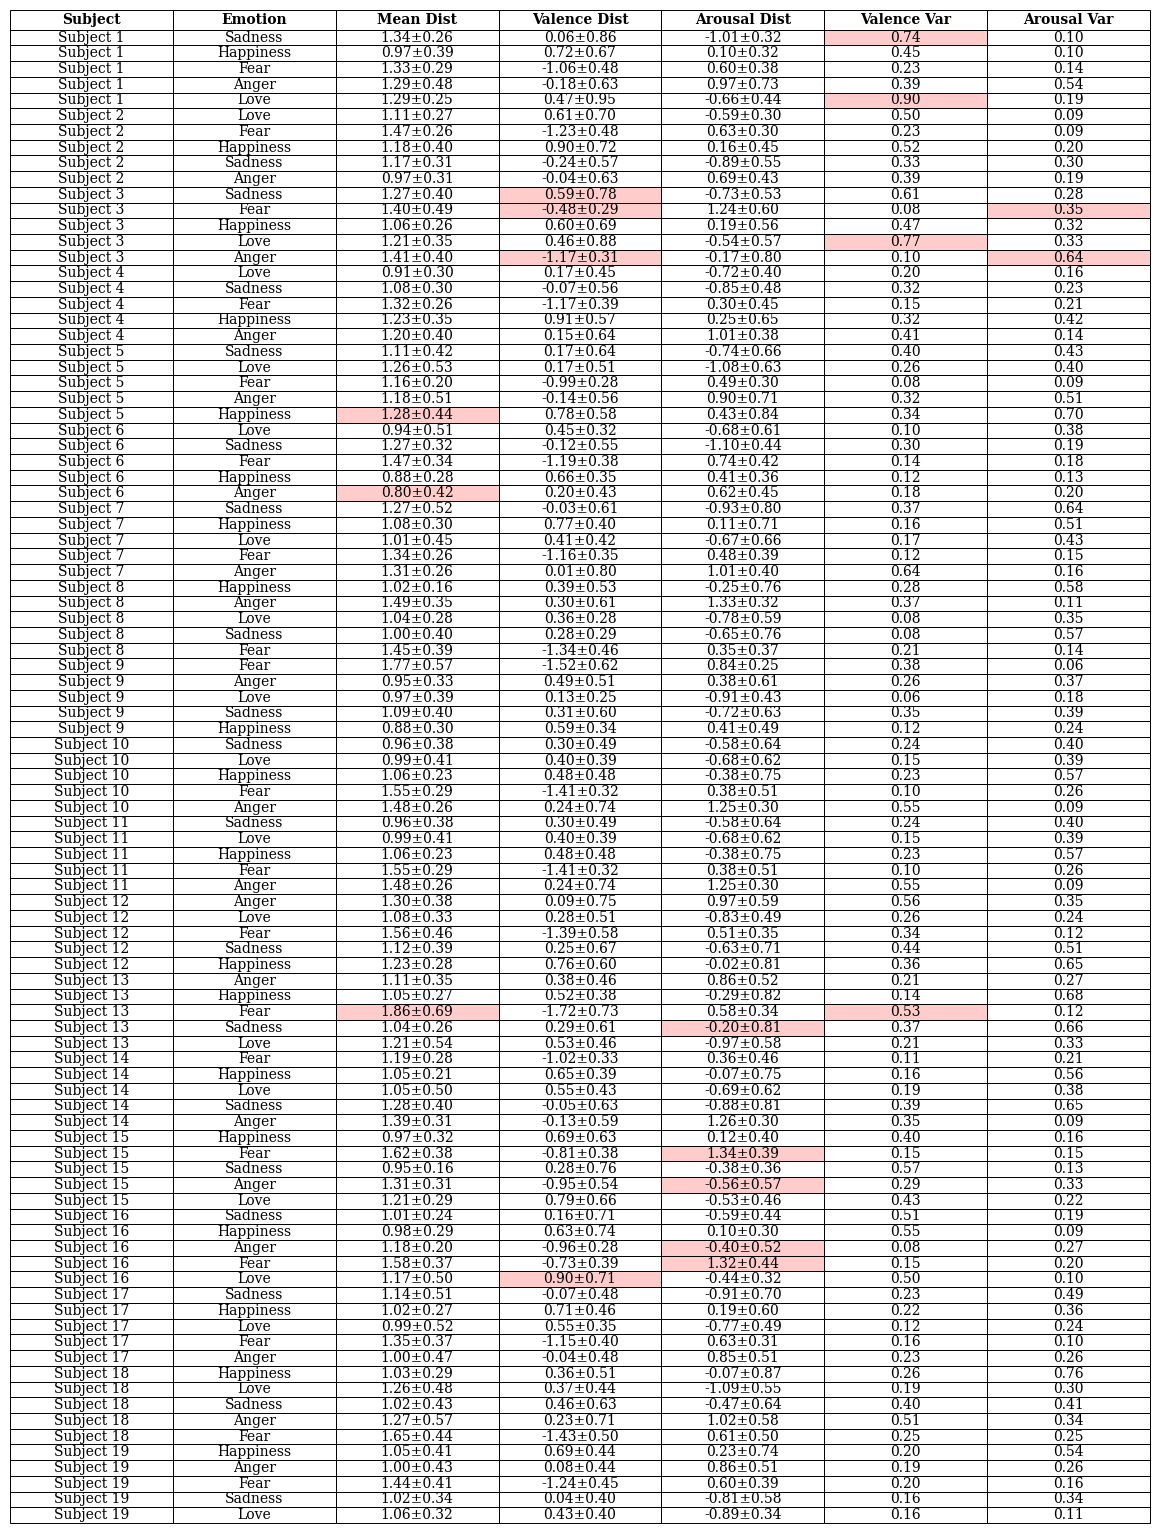

In [28]:
import scipy.stats as st
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"
plt.rcParams["text.usetex"] = False

header = [
    "Subject", "Emotion",
    "Mean Dist",
    "Valence Dist",
    "Arousal Dist",
    "Valence Var",
    "Arousal Var"
]
table_data = [header]
raw_values = []  # (subject_id, emotion, stats_dict)

for subj_key, df in aligned_subjects.items():
    subj_id = int(subj_key.split("_")[1])
    subj_label = f"Subject {subj_id}"

    for emotion in df['EmotionLabel'].unique():
        if emotion not in sub_ALL_centroids:
            continue

        subset = df[df['EmotionLabel'] == emotion]
        n = len(subset)
        if n <= 1:
            continue

        Y_emotion = np.stack([
            subset['PC1_aligned'].to_numpy(),
            subset['PC2_aligned'].to_numpy()
        ])
        target = np.array(sub_ALL_centroids[emotion]).reshape(2, 1)

        diff = Y_emotion - target
        eucl_dist = np.linalg.norm(diff, axis=0)
        mean_eucl = np.mean(eucl_dist)
        std_eucl = np.std(eucl_dist, ddof=1)

        compwise_mean = np.mean(diff, axis=1)
        compwise_std = np.std(diff, axis=1, ddof=1)
        compwise_var = [np.var(Y_emotion[i, :], ddof=1) for i in range(2)]

        row = [
            subj_label,
            emotion.capitalize(),
            f"{mean_eucl:.2f}±{std_eucl:.2f}",
            f"{compwise_mean[0]:.2f}±{compwise_std[0]:.2f}",
            f"{compwise_mean[1]:.2f}±{compwise_std[1]:.2f}",
            f"{compwise_var[0]:.2f}",
            f"{compwise_var[1]:.2f}"
        ]
        table_data.append(row)
        raw_values.append((subj_id, emotion, {
            'mean_dist': mean_eucl,
            'val_dist': compwise_mean[0],
            'aro_dist': compwise_mean[1],
            'val_var': compwise_var[0],
            'aro_var': compwise_var[1]
        }))

# --- Compute per-emotion stats for outlier detection ---
from collections import defaultdict

emotion_stats = defaultdict(lambda: defaultdict(list))

for _, emotion, stats in raw_values:
    for key, val in stats.items():
        emotion_stats[emotion][key].append(val)

# Compute mean ± 2 std bounds for each stat per emotion
emotion_bounds = {
    emotion: {
        key: (
            np.mean(vals),
            np.std(vals)
        ) for key, vals in stats.items()
    } for emotion, stats in emotion_stats.items()
}

# --- Render Table with Red Highlighting ---
fig, ax = plt.subplots(figsize=(12, 0.6 + 0.3 * len(table_data)))
ax.axis('off')

table = ax.table(
    cellText=table_data,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)

# Highlight outliers in red
for (row, col), cell in table.get_celld().items():
    cell.set_edgecolor('black')
    cell.set_linewidth(0.7)
    if row == 0:
        cell.set_fontsize(10)
        cell.set_text_props(weight='bold')
        cell.set_height(0.025)
        continue
    else:
        cell.set_height(0.02)

    if col < 2:
        continue  # skip "Subject", "Emotion"

    stat_key_map = {
        2: 'mean_dist',
        3: 'val_dist',
        4: 'aro_dist',
        5: 'val_var',
        6: 'aro_var'
    }
    subj_label = table[row, 0].get_text().get_text()
    subj_id = int(subj_label.split()[-1])
    emotion = table[row, 1].get_text().get_text().upper()

    # Extract just the stat value (not ± std)
    stat_text = cell.get_text().get_text()
    stat_key = stat_key_map[col]

    try:
        stat_value = float(stat_text.split("±")[0]) if "±" in stat_text else float(stat_text)
        mean, std = emotion_bounds[emotion][stat_key]
        if stat_value < mean - 2 * std or stat_value > mean + 2 * std:
            cell.set_facecolor('#ffcccc')  # light red
    except:
        continue

plt.tight_layout()
plt.show()


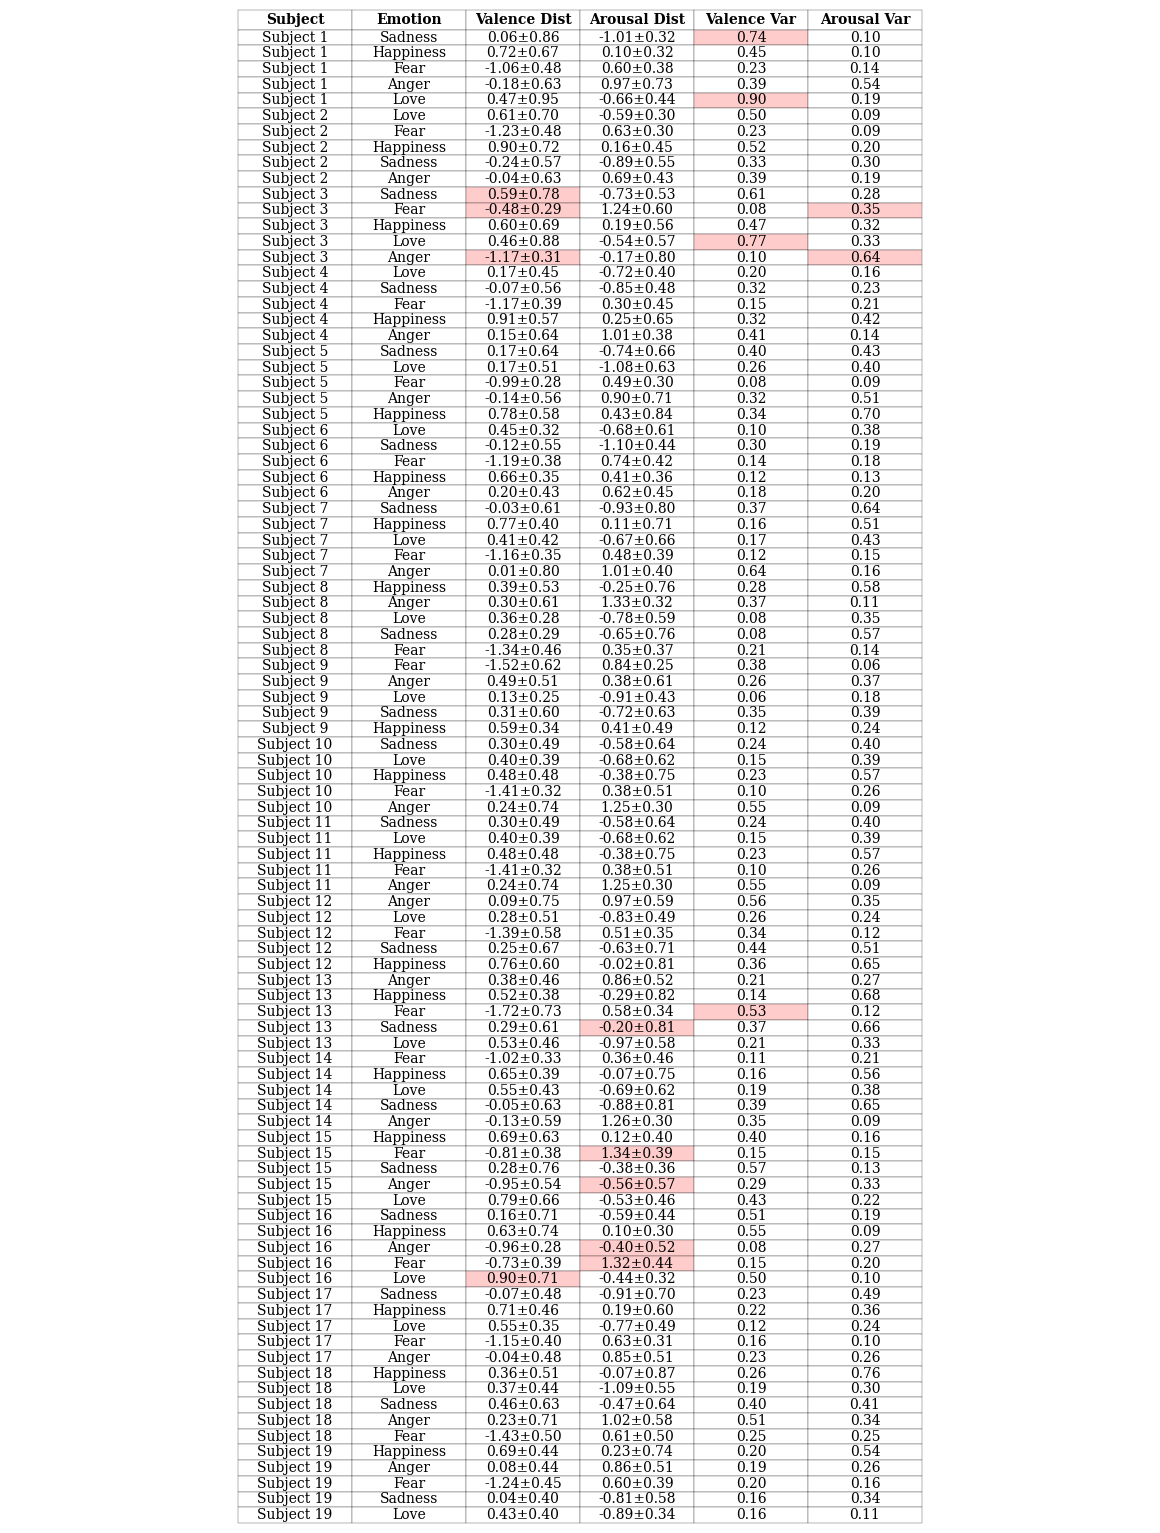

In [29]:
header = [
    "Subject", "Emotion",
    "Valence Dist",
    "Arousal Dist",
    "Valence Var",
    "Arousal Var"
]
table_data = [header]
raw_values = []

for subj_key, df in aligned_subjects.items():
    subj_id = int(subj_key.split("_")[1])
    subj_label = f"Subject {subj_id}"

    for emotion in df['EmotionLabel'].unique():
        if emotion not in sub_ALL_centroids:
            continue

        subset = df[df['EmotionLabel'] == emotion]
        n = len(subset)
        if n <= 1:
            continue

        Y_emotion = np.stack([
            subset['PC1_aligned'].to_numpy(),
            subset['PC2_aligned'].to_numpy()
        ])
        target = np.array(sub_ALL_centroids[emotion]).reshape(2, 1)

        diff = Y_emotion - target
        compwise_mean = np.mean(diff, axis=1)
        compwise_std = np.std(diff, axis=1, ddof=1)
        compwise_var = [np.var(Y_emotion[i, :], ddof=1) for i in range(2)]

        row = [
            subj_label,
            emotion.capitalize(),
            f"{compwise_mean[0]:.2f}±{compwise_std[0]:.2f}",
            f"{compwise_mean[1]:.2f}±{compwise_std[1]:.2f}",
            f"{compwise_var[0]:.2f}",
            f"{compwise_var[1]:.2f}"
        ]
        table_data.append(row)
        raw_values.append((subj_id, emotion, {
            'val_dist': compwise_mean[0],
            'aro_dist': compwise_mean[1],
            'val_var': compwise_var[0],
            'aro_var': compwise_var[1]
        }))

# --- unchanged emotion_stats and emotion_bounds blocks ---

# --- Render Table with Red Highlighting ---
fig, ax = plt.subplots(figsize=(12, 0.6 + 0.3 * len(table_data)))
ax.axis('off')

table = ax.table(
    cellText=table_data,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)

stat_key_map = {
    2: 'val_dist',
    3: 'aro_dist',
    4: 'val_var',
    5: 'aro_var'
}

for (row, col), cell in table.get_celld().items():
    cell.set_edgecolor('black')
    cell.set_linewidth(0.2)
    if row == 0:
        cell.set_fontsize(10)
        cell.set_text_props(weight='bold')
        cell.set_height(0.025)
        cell.set_width(0.1)
        continue
    else:
        cell.set_height(0.02)
        cell.set_width(0.1)

    if col < 2:
        continue

    subj_label = table[row, 0].get_text().get_text()
    subj_id = int(subj_label.split()[-1])
    emotion = table[row, 1].get_text().get_text().upper()
    stat_text = cell.get_text().get_text()
    stat_key = stat_key_map[col]

    try:
        stat_value = float(stat_text.split("±")[0]) if "±" in stat_text else float(stat_text)
        mean, std = emotion_bounds[emotion][stat_key]
        if stat_value < mean - 2 * std or stat_value > mean + 2 * std:
            cell.set_facecolor('#ffcccc')
    except:
        continue

plt.tight_layout()
plt.show()


In [31]:
import pandas as pd

records = []
for subj_id, emotion, stats_dict in raw_values:
    records.append({
        "Subject": subj_id,
        "Emotion": emotion,
        "ValenceDist": stats_dict["val_dist"],
        "ArousalDist": stats_dict["aro_dist"],
        "ValenceVar": stats_dict["val_var"],
        "ArousalVar": stats_dict["aro_var"],
    })

stats_df = pd.DataFrame(records)


KeyError: 'MeanDist'

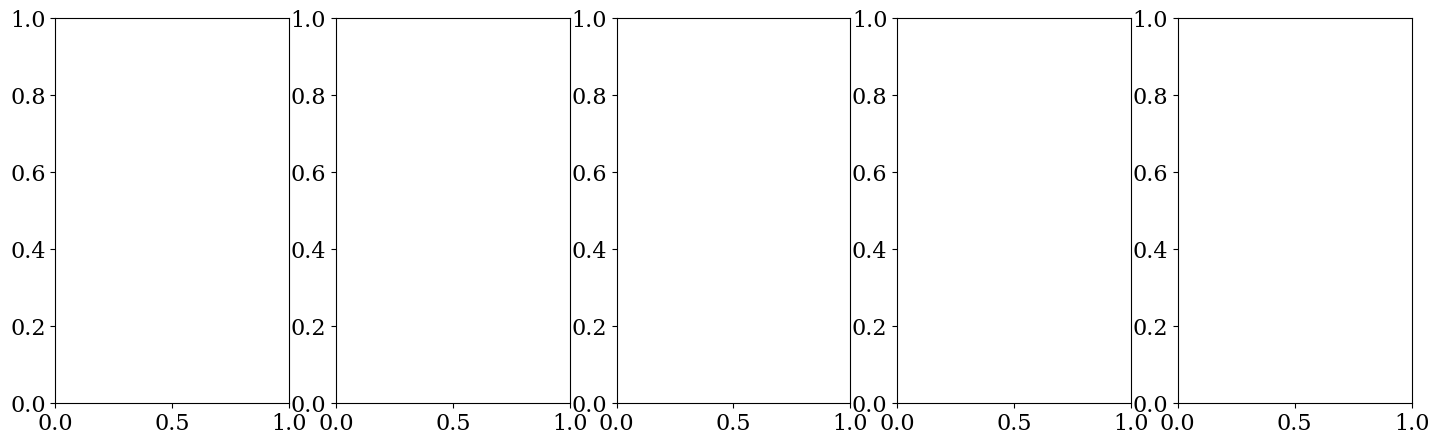

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Unique statistics to plot
stat_keys = ["MeanDist", "ValenceDist", "ArousalDist", "ValenceVar", "ArousalVar"]

# Sort emotions for consistent ordering
emotions = sorted(stats_df["Emotion"].unique())

fig, axes = plt.subplots(
    nrows=1, ncols=len(stat_keys),
    figsize=(3.5 * len(stat_keys), 5),
    sharey=False
)

for ax, stat_key in zip(axes, stat_keys):
    # Gather data for each emotion
    data = [
        stats_df.loc[stats_df["Emotion"] == e, stat_key].values
        for e in emotions
    ]
    
    # Create the violin plot
    # positions=range(1, len(emotions)+1) ensures each emotion is placed consistently on x-axis
    parts = ax.violinplot(data, positions=range(1, len(emotions) + 1),
                          showmeans=True, showextrema=True, showmedians=False)
    
    ax.set_title(stat_key, fontsize=12, fontweight='bold')
    ax.set_xticks(range(1, len(emotions) + 1))
    ax.set_xticklabels(emotions, rotation=45, ha='right')
    
    # Optional: add grid or custom styling
    ax.grid(True, linestyle=':', alpha=0.5)
    # You can customize violin colors:
    for pc in parts['bodies']:
        pc.set_facecolor('lightblue')
        pc.set_alpha(0.7)
    parts['cmeans'].set_edgecolor('black')
    parts['cmeans'].set_linewidth(2)
    parts['cbars'].set_linewidth(1)
    parts['cmaxes'].set_linewidth(1)
    parts['cmins'].set_linewidth(1)

plt.tight_layout()
plt.show()


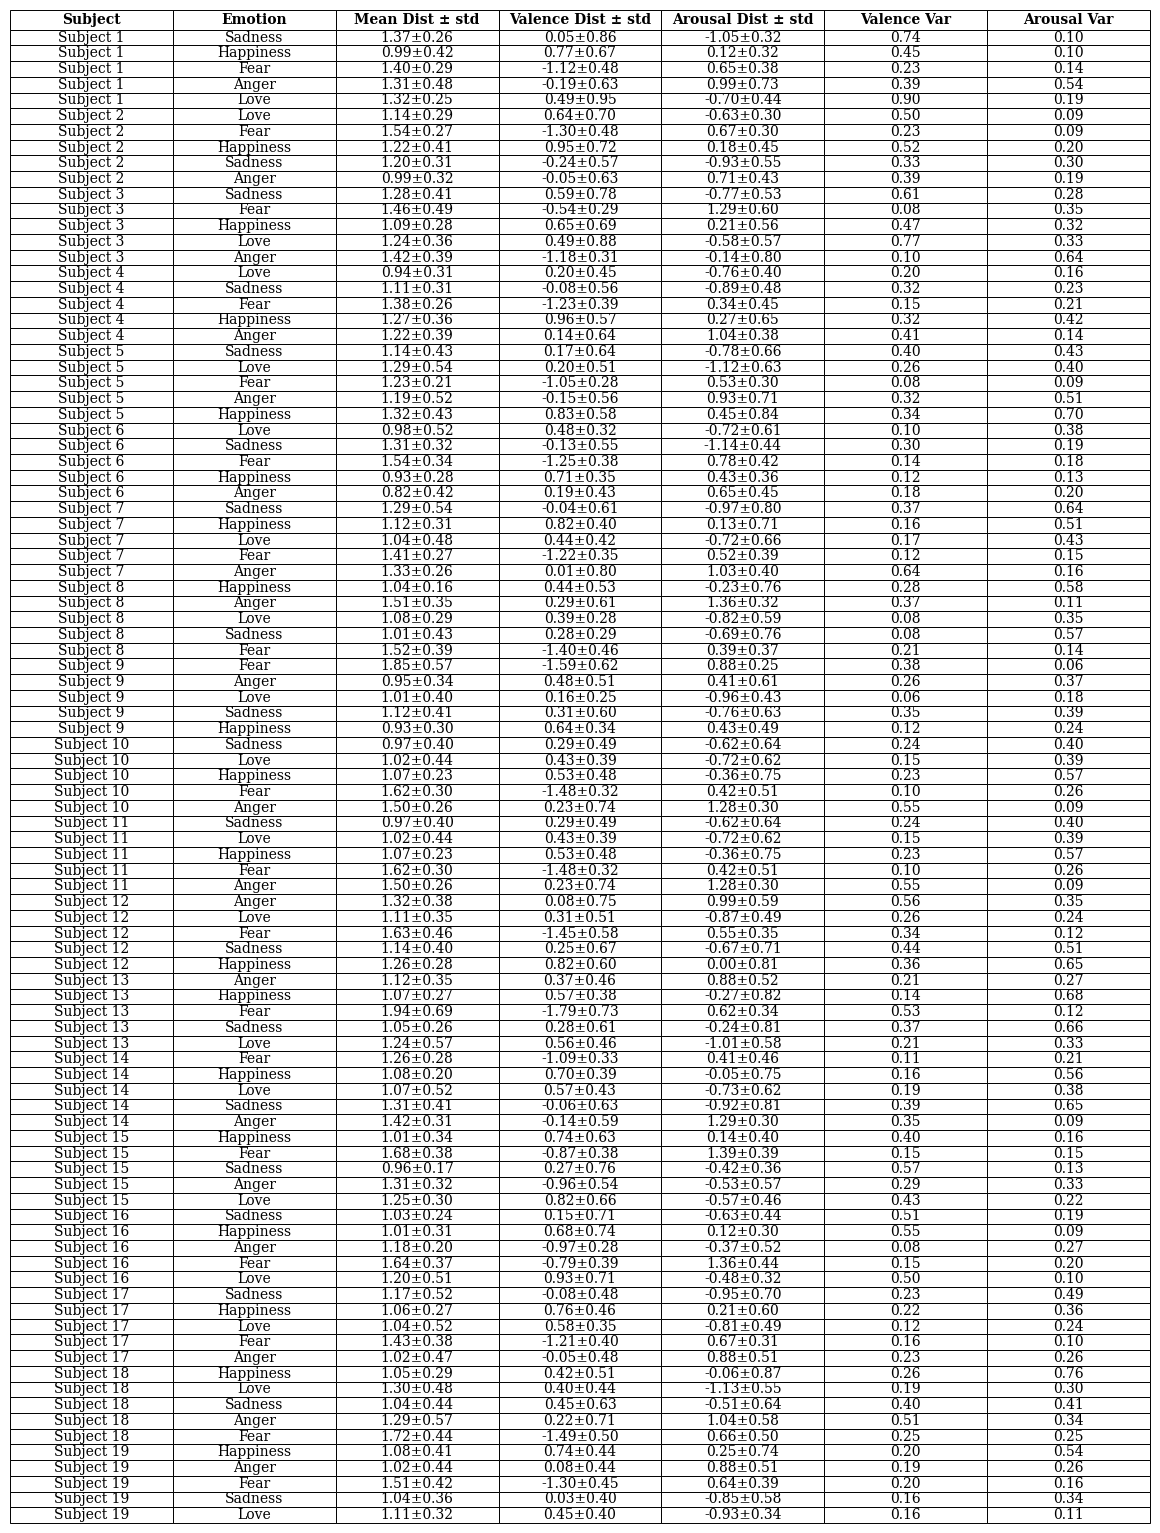

In [33]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

# Use LaTeX-style serif font
plt.rcParams["font.family"] = "serif"
plt.rcParams["text.usetex"] = False

# Table header
table_data = [
    [
        "Subject", "Emotion",
        "Mean Dist ± std",
        "Valence Dist ± std",
        "Arousal Dist ± std",
        "Valence Var",
        "Arousal Var"
    ]
]

for subj_key, df in aligned_subjects.items():
    subj_id = int(subj_key.split("_")[1])  # extract number from sub_XX
    subj_label = f"Subject {subj_id}"

    for emotion in df['EmotionLabel'].unique():
        # Get all points (Valence, Arousal) for this subject & emotion
        subset = df[df['EmotionLabel'] == emotion]
        n = len(subset)
        if n <= 1:
            continue

        # Y_emotion shape: (2, n)
        Y_emotion = np.stack([
            subset['PC1_aligned'].to_numpy(),
            subset['PC2_aligned'].to_numpy()
        ])

        # Distance from origin => diff = Y_emotion (no subtraction needed)
        diff = Y_emotion  # shape (2, n)

        # Euclidean distance from origin
        eucl_dist = np.linalg.norm(diff, axis=0)  # shape (n,)
        mean_eucl = np.mean(eucl_dist)
        std_eucl = np.std(eucl_dist, ddof=1)

        # Component-wise distance from origin
        compwise_mean = np.mean(diff, axis=1)  # [mean_x, mean_y]
        compwise_std  = np.std(diff, axis=1, ddof=1)

        # Component-wise variance
        compwise_var = [np.var(Y_emotion[i, :], ddof=1) for i in range(2)]

        row = [
            subj_label,
            emotion.capitalize(),
            f"{mean_eucl:.2f}±{std_eucl:.2f}",
            f"{compwise_mean[0]:.2f}±{compwise_std[0]:.2f}",  # Valence
            f"{compwise_mean[1]:.2f}±{compwise_std[1]:.2f}",  # Arousal
            f"{compwise_var[0]:.2f}",
            f"{compwise_var[1]:.2f}"
        ]
        table_data.append(row)

# Render the table
fig, ax = plt.subplots(figsize=(12, 0.6 + 0.3 * len(table_data)))
ax.axis('off')

table = ax.table(
    cellText=table_data,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)

for (row, col), cell in table.get_celld().items():
    cell.set_edgecolor('black')
    cell.set_linewidth(0.7)
    if row == 0:
        cell.set_fontsize(10)
        cell.set_text_props(weight='bold')
        cell.set_height(0.025)
    else:
        cell.set_height(0.02)

plt.tight_layout()
plt.show()


In [40]:
import pandas as pd
import numpy as np

records = []
for subj_key, df in aligned_subjects.items():
    subj_id = int(subj_key.split("_")[1])  # "sub_01" -> 1
    for emotion in df['EmotionLabel'].unique():
        subset = df[df['EmotionLabel'] == emotion]
        for row in subset.itertuples():
            x = row.PC1_aligned
            y = row.PC2_aligned
            dist_origin = np.sqrt(x**2 + y**2)
            records.append({
                "Subject": f"Subject {subj_id}",
                "Emotion": emotion,
                "Valence": x,
                "Arousal": y,
                "DistOrigin": dist_origin
            })

points_df = pd.DataFrame(records)


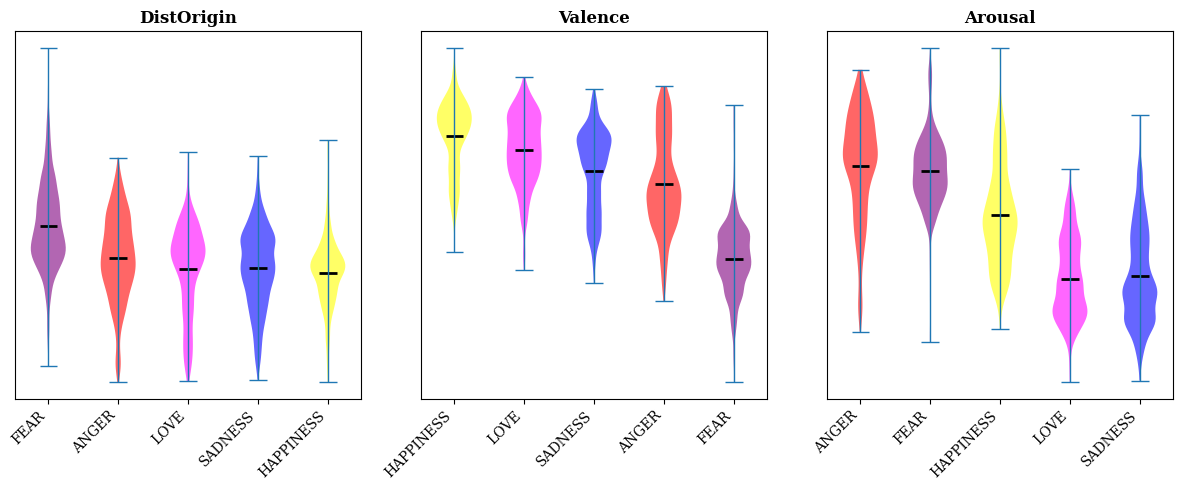

In [43]:
import matplotlib.pyplot as plt

# Emotion orders
emotion_order_by_stat = {
    "Valence": ["HAPPINESS", "LOVE", "SADNESS", "ANGER", "FEAR"],
    "DistOrigin": ["FEAR", "ANGER", "LOVE", "SADNESS", "HAPPINESS"],
    "Arousal": sorted(points_df["Emotion"].unique())
}

stat_keys = ["DistOrigin", "Valence", "Arousal"]
color_map = {
    'HAPPINESS': 'yellow',
    'ANGER': 'red',
    'SADNESS': 'blue',
    'LOVE': 'magenta',
    'FEAR': 'purple'
}

fig, axes = plt.subplots(
    nrows=1, ncols=len(stat_keys),
    figsize=(4 * len(stat_keys), 5),
    sharey=False
)

for ax, stat_key in zip(axes, stat_keys):
    emotions = emotion_order_by_stat[stat_key]
    data = [
        points_df.loc[points_df["Emotion"] == e, stat_key].values
        for e in emotions
    ]

    parts = ax.violinplot(data, positions=range(len(emotions)), showmeans=True, showextrema=True)

    for i, body in enumerate(parts['bodies']):
        e = emotions[i]
        body.set_facecolor(color_map.get(e, "gray"))
        body.set_alpha(0.6)

    # Style mean, min/max lines
    parts['cmeans'].set_edgecolor('black')
    parts['cmeans'].set_linewidth(2)
    parts['cbars'].set_linewidth(1)
    parts['cmins'].set_linewidth(1)
    parts['cmaxes'].set_linewidth(1)

    ax.set_title(stat_key, fontsize=12, fontweight='bold')
    ax.set_xticks(range(len(emotions)))
    ax.set_xticklabels(emotions, rotation=45, ha='right')

    # Remove axis labels and ticks
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_yticklabels([])  # <--- this removes y-axis units
    ax.tick_params(axis='y', length=0)  # optional: removes y tick lines


plt.tight_layout()
plt.show()


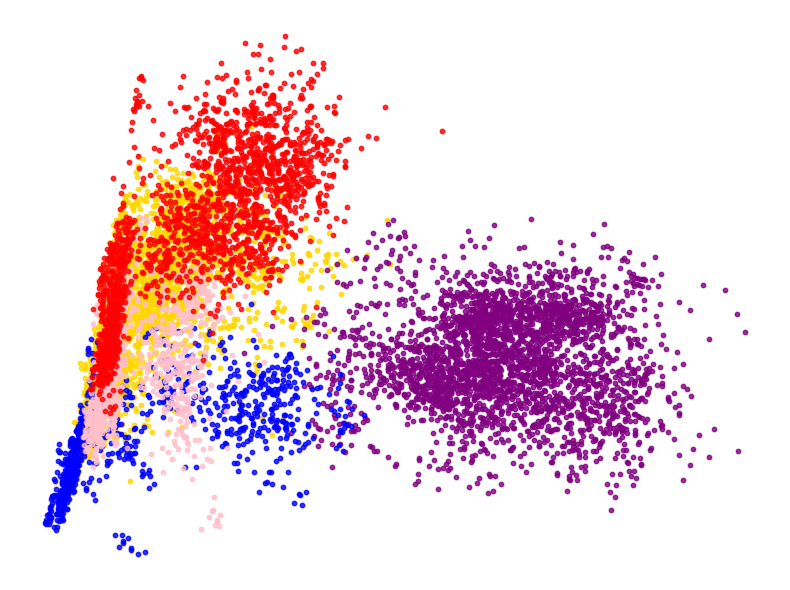

Figure saved to: /Users/joshualunger/DEAnalysis/figures/PCA/hidden/sub_ALL_ao_annotations.png


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Global save path
SAVE_PATH = "/Users/joshualunger/DEAnalysis/figures/PCA/hidden/sub_ALL_ao_annotations.png"

# Load PCA data
csv_path = "/Users/joshualunger/DEAnalysis/PCA/hidden/sub_ALL_ao_annotations.csv"
df = pd.read_csv(csv_path)

# Define intuitive color mapping
emotion_colors = {
    "HAPPINESS": "gold",
    "FEAR": "purple",
    "SADNESS": "blue",
    "LOVE": "pink",
    "ANGER": "red",
    "NONE": "gray"
}

# Plot
plt.figure(figsize=(8, 6))
for emotion, color in emotion_colors.items():
    subset = df[df["EmotionLabel"] == emotion]
    if not subset.empty:
        plt.scatter(subset["PC1"], subset["PC2"], label=emotion, 
                    color=color, s=10, alpha=0.8)

# Remove axes and grid
plt.xticks([])
plt.yticks([])
plt.box(False)
plt.grid(False)

# Legend without title or frame
plt.tight_layout()
plt.savefig(SAVE_PATH, dpi=300, bbox_inches='tight')
plt.show()

print(f"Figure saved to: {SAVE_PATH}")


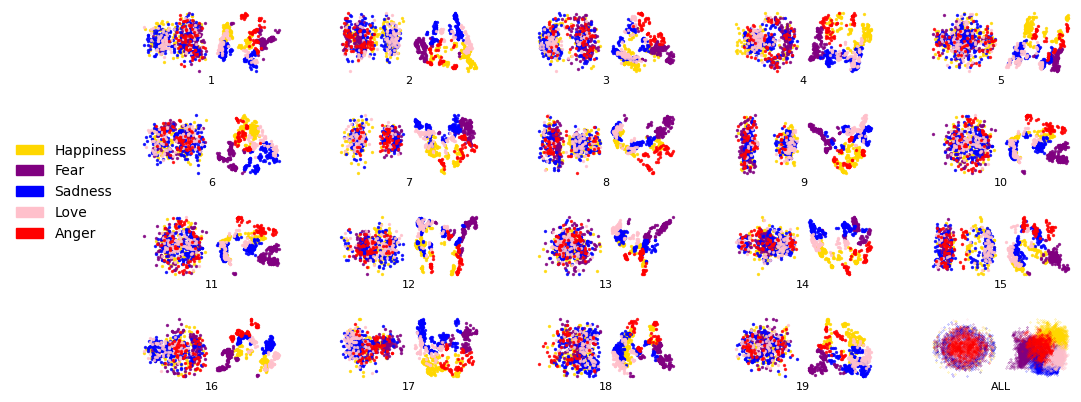

Figure saved to: /Users/joshualunger/DEAnalysis/figures/PCA/grid_all_subjects_with_spacing.png


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Paths
RAW_DIR = "/Users/joshualunger/DEAnalysis/PCA/raw"
HIDDEN_DIR = "/Users/joshualunger/DEAnalysis/PCA/hidden"
SAVE_PATH = "/Users/joshualunger/DEAnalysis/figures/PCA/grid_all_subjects_with_spacing.png"

# Emotion color map
emotion_colors = {
    "HAPPINESS": "gold",
    "FEAR": "purple",
    "SADNESS": "blue",
    "LOVE": "pink",
    "ANGER": "red",
}

# Layout
num_subjects = 20  # now includes sub_ALL
cols = 5
rows = 4

fig, axes = plt.subplots(rows, cols, figsize=(cols * 2.4, rows * 1.2), gridspec_kw={'wspace': 0.4, 'hspace': 0.6})

for idx in range(num_subjects):
    if idx < 19:
        subject_index = idx + 1
        sub_id = f"sub_{subject_index:02d}"
        title_str = f"{subject_index}"
    else:
        sub_id = "sub_ALL"
        title_str = "ALL"

    raw_path = os.path.join(RAW_DIR, f"{sub_id}.csv")
    hidden_path = os.path.join(HIDDEN_DIR, f"{sub_id}.csv")

    raw_df = pd.read_csv(raw_path)
    hidden_df = pd.read_csv(hidden_path)

    row = idx // cols
    col = idx % cols
    ax = axes[row][col]

    inset_raw = ax.inset_axes([0.0, 0.0, 0.48, 1.0])
    inset_hidden = ax.inset_axes([0.52, 0.0, 0.48, 1.0])

    for emotion, color in emotion_colors.items():
        r = raw_df[raw_df["EmotionLabel"] == emotion]
        h = hidden_df[hidden_df["EmotionLabel"] == emotion]
        size = .05 if sub_id == "sub_ALL" else 2
        if not r.empty:
            inset_raw.scatter(r["PC1"], r["PC2"], color=color, s=size, alpha=0.8)
        if not h.empty:
            inset_hidden.scatter(h["PC1"], h["PC2"], color=color, s=size, alpha=0.8)


    for a in [inset_raw, inset_hidden]:
        a.set_xticks([])
        a.set_yticks([])
        a.set_frame_on(False)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

    ax.text(0.5, -0.12, title_str, transform=ax.transAxes,
            ha="center", va="center", fontsize=8)

# Create legend handles
legend_handles = [
    Patch(color=color, label=emotion.capitalize()) for emotion, color in emotion_colors.items()
]

# Add legend to the left-center of the figure
fig.legend(
    handles=legend_handles,
    loc="center left",
    bbox_to_anchor=(0.01, 0.5),
    frameon=False,
    fontsize=10
)

plt.savefig(SAVE_PATH, dpi=300, bbox_inches="tight")
plt.show()

print(f"Figure saved to: {SAVE_PATH}")


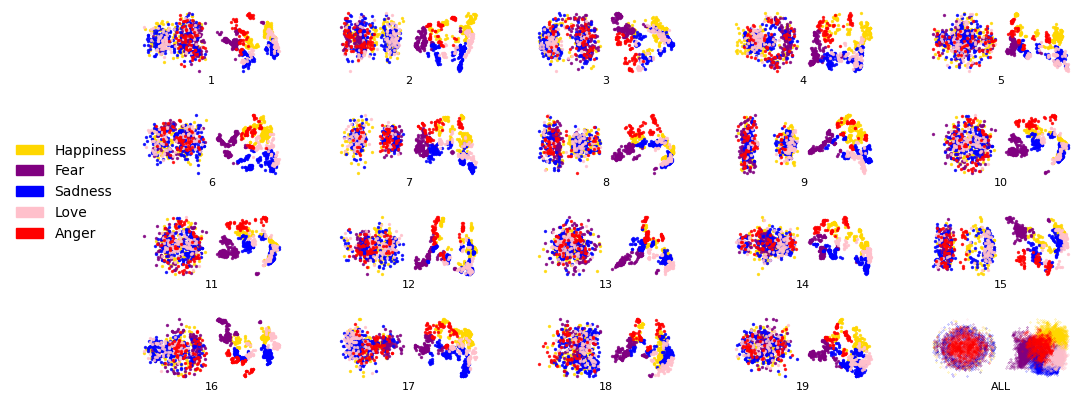

Figure saved to: /Users/joshualunger/DEAnalysis/figures/PCA/grid_all_subjects_with_spacing.png


In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# -----------------------------------------------------------
# 1) LOAD sub_ALL and compute emotion centroids for reference
# -----------------------------------------------------------

HIDDEN_DIR = "/Users/joshualunger/DEAnalysis/PCA/hidden"
sub_all_id = "sub_ALL"
sub_all_path = os.path.join(HIDDEN_DIR, f"{sub_all_id}.csv")
df_all = pd.read_csv(sub_all_path)

sub_ALL_centroids = {}
for emotion in df_all["EmotionLabel"].unique():
    pts = df_all[df_all["EmotionLabel"] == emotion][["PC1", "PC2"]].to_numpy()
    sub_ALL_centroids[emotion] = pts.mean(axis=0)

# ----------------------------------------------------------
# 2) DEFINE A FUNCTION TO ALIGN HIDDEN DATA TO sub_ALL
# ----------------------------------------------------------

def align_subject(df_sub, all_centroids):
    """
    df_sub is the subject's dataframe containing 'EmotionLabel', 'PC1', 'PC2'
    all_centroids is a dict of {emotion: [x_centroid, y_centroid]} from sub_ALL
    Returns a copy of df_sub with PC1_aligned and PC2_aligned.
    """
    # Filter to only the emotions that appear in sub_ALL
    emotions = [e for e in df_sub['EmotionLabel'].unique() if e in all_centroids]
    if not emotions:
        # nothing to align
        df_sub["PC1_aligned"] = df_sub["PC1"]
        df_sub["PC2_aligned"] = df_sub["PC2"]
        return df_sub

    # Compute observed vs. target centroids
    observed_centroids = []
    target_centroids = []
    for emotion in emotions:
        pts = df_sub[df_sub["EmotionLabel"] == emotion][["PC1", "PC2"]].to_numpy()
        obs_centroid = pts.mean(axis=0)
        tgt_centroid = np.array(all_centroids[emotion])
        observed_centroids.append(obs_centroid)
        target_centroids.append(tgt_centroid)

    observed_centroids = np.vstack(observed_centroids)
    target_centroids   = np.vstack(target_centroids)

    # Compute rotation matrix (reflection allowed)
    obs_mean = observed_centroids.mean(axis=0)
    tgt_mean = target_centroids.mean(axis=0)

    A = observed_centroids - obs_mean
    B = target_centroids - tgt_mean
    U, _, Vt = np.linalg.svd(A.T @ B)
    R = Vt.T @ U.T  # reflection allowed

    # Apply rotation
    X = df_sub[["PC1", "PC2"]].to_numpy()
    X_centered = X - obs_mean
    X_rotated = (R @ X_centered.T).T + tgt_mean

    # Normalize so that the new centroids lie ~on the unit circle
    aligned_centroids = []
    for emotion in emotions:
        idx = df_sub.index[df_sub["EmotionLabel"] == emotion]
        centroid = X_rotated[idx].mean(axis=0)
        aligned_centroids.append(centroid)
    aligned_centroids = np.vstack(aligned_centroids)
    scale = 1.0 / np.mean(np.linalg.norm(aligned_centroids, axis=1))

    X_rotated_normalized = X_rotated * scale

    df_sub_aligned = df_sub.copy()
    df_sub_aligned["PC1_aligned"] = X_rotated_normalized[:, 0]
    df_sub_aligned["PC2_aligned"] = X_rotated_normalized[:, 1]

    return df_sub_aligned

# ----------------------------------------------------------
# 3) ALIGN ALL SUBJECTS’ HIDDEN DATA
# ----------------------------------------------------------
aligned_subjects = {}
for subj_id in range(1, 20):  # sub_01 to sub_19
    sub_str = f"sub_{subj_id:02d}"
    path_sub = os.path.join(HIDDEN_DIR, f"{sub_str}.csv")
    df_sub = pd.read_csv(path_sub)
    df_aligned = align_subject(df_sub, sub_ALL_centroids)
    aligned_subjects[sub_str] = df_aligned

# Optionally, include sub_ALL as-is (no alignment needed)
aligned_subjects[sub_all_id] = df_all.copy()
aligned_subjects[sub_all_id]["PC1_aligned"] = df_all["PC1"]
aligned_subjects[sub_all_id]["PC2_aligned"] = df_all["PC2"]

# ----------------------------------------------------------
# 4) PLOT RAW vs. ALIGNED (HIDDEN) ACROSS SUBJECTS
# ----------------------------------------------------------

RAW_DIR = "/Users/joshualunger/DEAnalysis/PCA/raw"
SAVE_PATH = "/Users/joshualunger/DEAnalysis/figures/PCA/grid_all_subjects_with_spacing.png"

emotion_colors = {
    "HAPPINESS": "gold",
    "FEAR": "purple",
    "SADNESS": "blue",
    "LOVE": "pink",
    "ANGER": "red",
}

num_subjects = 20  # 19 + sub_ALL
cols = 5
rows = 4

fig, axes = plt.subplots(rows, cols,
                         figsize=(cols * 2.4, rows * 1.2),
                         gridspec_kw={'wspace': 0.4, 'hspace': 0.6})

for idx in range(num_subjects):
    if idx < 19:
        subject_index = idx + 1
        sub_id = f"sub_{subject_index:02d}"
        title_str = f"{subject_index}"
    else:
        sub_id = "sub_ALL"
        title_str = "ALL"

    # Read raw
    raw_path = os.path.join(RAW_DIR, f"{sub_id}.csv")
    raw_df = pd.read_csv(raw_path)

    # Grab the aligned hidden data
    hidden_df = aligned_subjects[sub_id]

    row = idx // cols
    col = idx % cols
    ax = axes[row][col]

    inset_raw = ax.inset_axes([0.0, 0.0, 0.48, 1.0])
    inset_hidden = ax.inset_axes([0.52, 0.0, 0.48, 1.0])

    for emotion, color in emotion_colors.items():
        r = raw_df[raw_df["EmotionLabel"] == emotion]
        h = hidden_df[hidden_df["EmotionLabel"] == emotion]
        size = 0.05 if sub_id == "sub_ALL" else 2

        if not r.empty:
            inset_raw.scatter(r["PC1"], r["PC2"], color=color, s=size, alpha=0.8)
        if not h.empty:
            # Use the aligned columns for hidden data
            inset_hidden.scatter(h["PC1_aligned"], h["PC2_aligned"], 
                                 color=color, s=size, alpha=0.8)

    for a in [inset_raw, inset_hidden]:
        a.set_xticks([])
        a.set_yticks([])
        a.set_frame_on(False)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

    ax.text(0.5, -0.12, title_str, transform=ax.transAxes,
            ha="center", va="center", fontsize=8)

legend_handles = [
    Patch(color=color, label=emotion.capitalize())
    for emotion, color in emotion_colors.items()
]

fig.legend(handles=legend_handles,
           loc="center left",
           bbox_to_anchor=(0.01, 0.5),
           frameon=False,
           fontsize=10)

plt.savefig(SAVE_PATH, dpi=300, bbox_inches="tight")
plt.show()
print(f"Figure saved to: {SAVE_PATH}")


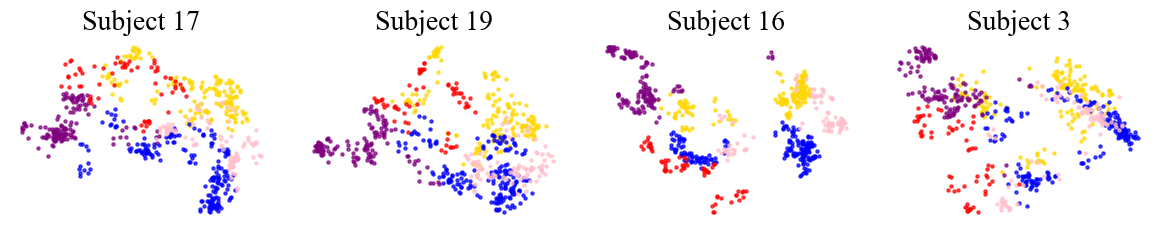

In [22]:
# %% [markdown]
# **Procrustes-Aligned Hidden PCs for Specific Subjects**
# 
# This cell plots the Procrustes-aligned hidden PCs of subjects 17, 19, 16, and 3, in that order (left to right).
# 
# It also places three large figure titles across the top: "Raw PCA," "Hidden Audio-Only PCA," and "Hidden Audio-Visual PCA."

# %% [code]
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

subjects_to_plot = [17, 19, 16, 3]
fig, axs = plt.subplots(1, len(subjects_to_plot), figsize=(12, 3), sharex=False, sharey=False)

plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 20,  # Increase base font size
    "axes.titlesize": 30,
    "axes.labelsize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 16
})

for i, subj in enumerate(subjects_to_plot):
    sub_str = f"sub_{subj:02d}"
    df_sub = aligned_subjects[sub_str]
    ax = axs[i]
    ax.set_title(f"Subject {subj}", fontsize=20)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    
    for emotion, color in emotion_colors.items():
        df_em = df_sub[df_sub["EmotionLabel"] == emotion]
        if not df_em.empty:
            ax.scatter(df_em["PC1_aligned"], df_em["PC2_aligned"], 
                       s=5, alpha=0.7, color=color)



plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()
